#  Logistic Regression
In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.  
Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.
Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.
## Visualizing the data

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [537]:
df = pd.read_csv("ex2data1.txt",header=None,names=["Exam1","Exam2","Admitted"])
df.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


<Figure size 432x288 with 0 Axes>

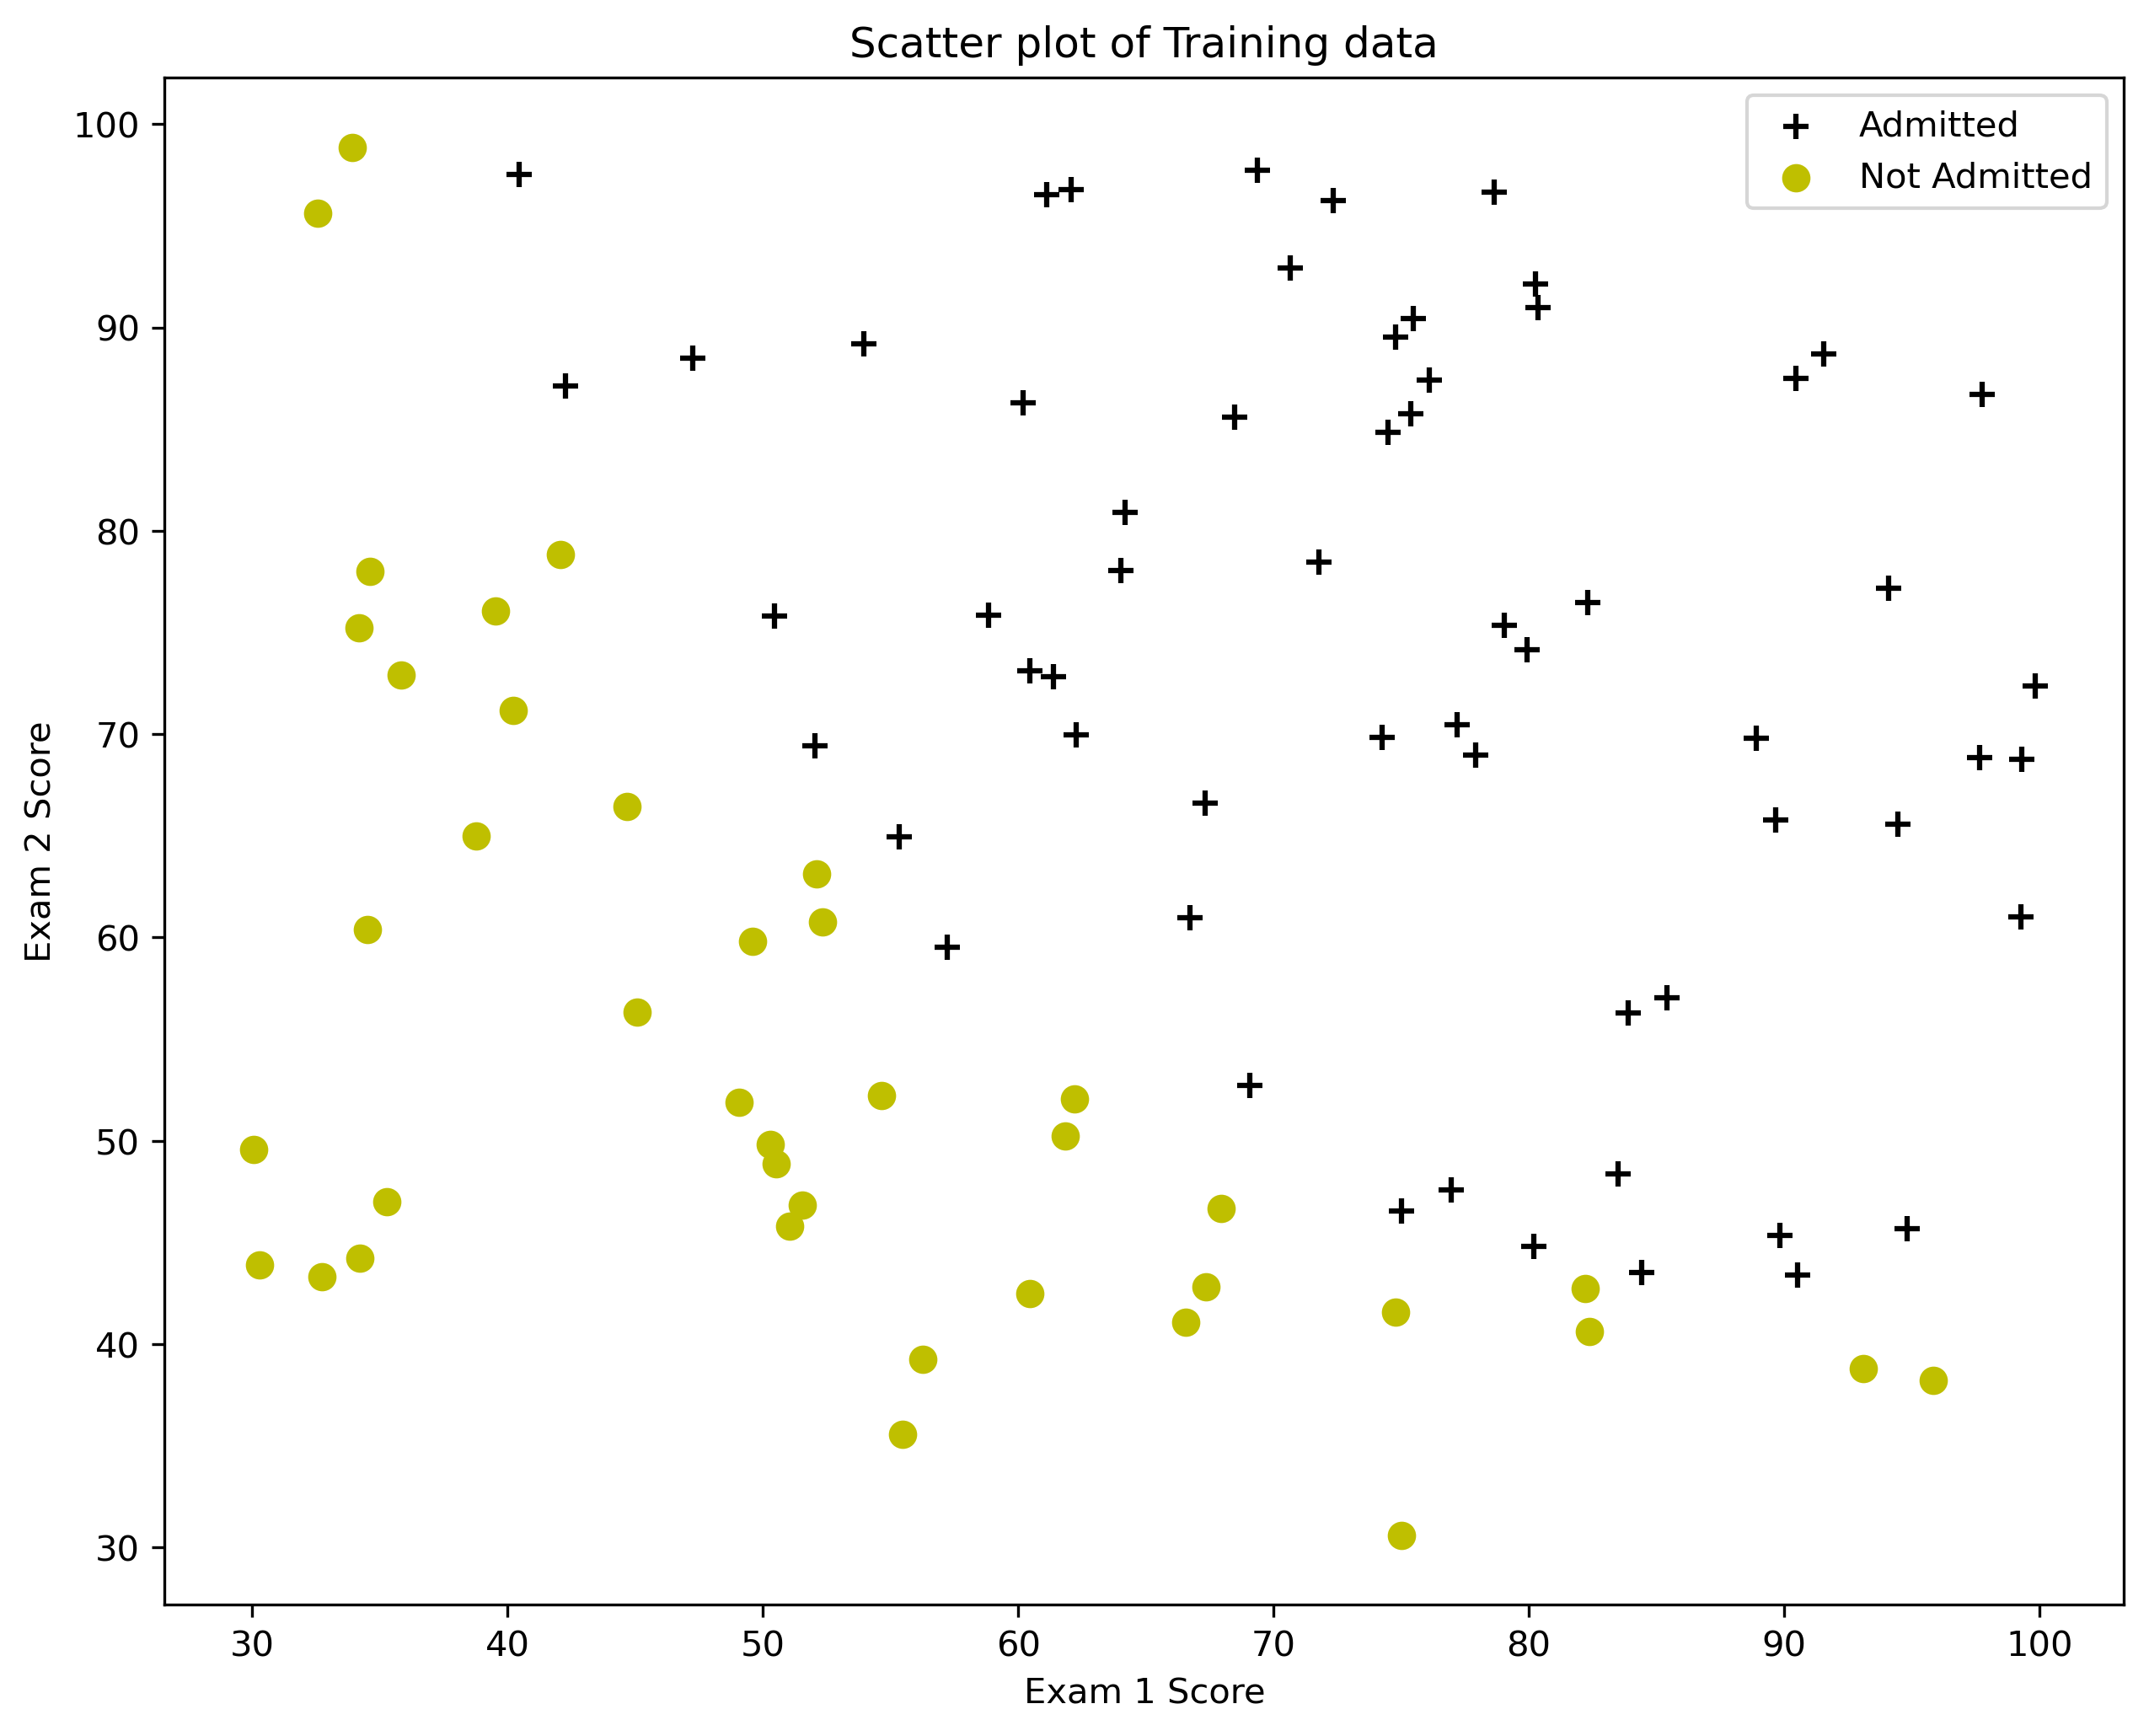

In [538]:
positive_df = df[df["Admitted"] == 1]
negative_df = df[df["Admitted"] == 0]
plt.clf()
plt.figure(dpi=300,figsize=(10,8))
plt.scatter(positive_df["Exam1"],positive_df["Exam2"],marker='+',c='black',s=50,label="Admitted")
plt.scatter(negative_df["Exam1"],negative_df["Exam2"],marker='o',c='y',s=50,label="Not Admitted")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.title("Scatter plot of Training data")
plt.legend()

## Implementation
通过对比对数据是否进行归一化，可以看到梯度下降的速度的明显差距
### gradient descent without feature scaling
不进行特征缩放时：1.学习率可能需要很小，代价函数才开始收敛。2.最终收敛所需的迭代次数非常多（收敛慢）

In [540]:
def sigmoid(x):
    return 1/( 1 + np.exp(-x) )
def cost_comput(theta,X,y):
    theta = np.matrix(theta).T
    first = np.multiply(y, np.log(sigmoid(X * theta)))
    second = np.multiply((y - 1), np.log(1 - sigmoid(X * theta)))
    return np.sum(second - first) / (len(X))
def gradient(theta,X,y):
    theta = np.mat(theta).T
    distance = sigmoid(X * theta) - y
#     print((X.T * distance ).shape)
#     return sum(np.multiply( distance,X )) / X.shape[0]
    return (X.T * distance ).T/ X.shape[0]

def logistic_regression_gradient_descent(X,y,iter_num,alpha=0.01):
    theta = np.zeros(X.shape[1])
    cost = []
    for i in range(iter_num):
        theta = theta - alpha * gradient(theta,X,y)
        cost.append(cost_comput(theta,X,y))
    theta = np.mat(theta).T
    return theta,cost

df["ones"]=1
X = np.mat(df[["ones","Exam1","Exam2"]])
y = np.mat(df["Admitted"]).T
theta = np.zeros(X.shape[1])

print(gradient(theta,X,y))
print(cost_comput(theta,X,y))

[[ -0.1        -12.00921659 -11.26284221]]
0.6931471805599453


[[-0.06253015]
 [ 0.01085921]
 [ 0.00093747]]
(3, 1)
0.6254658375063237


<Figure size 432x288 with 0 Axes>

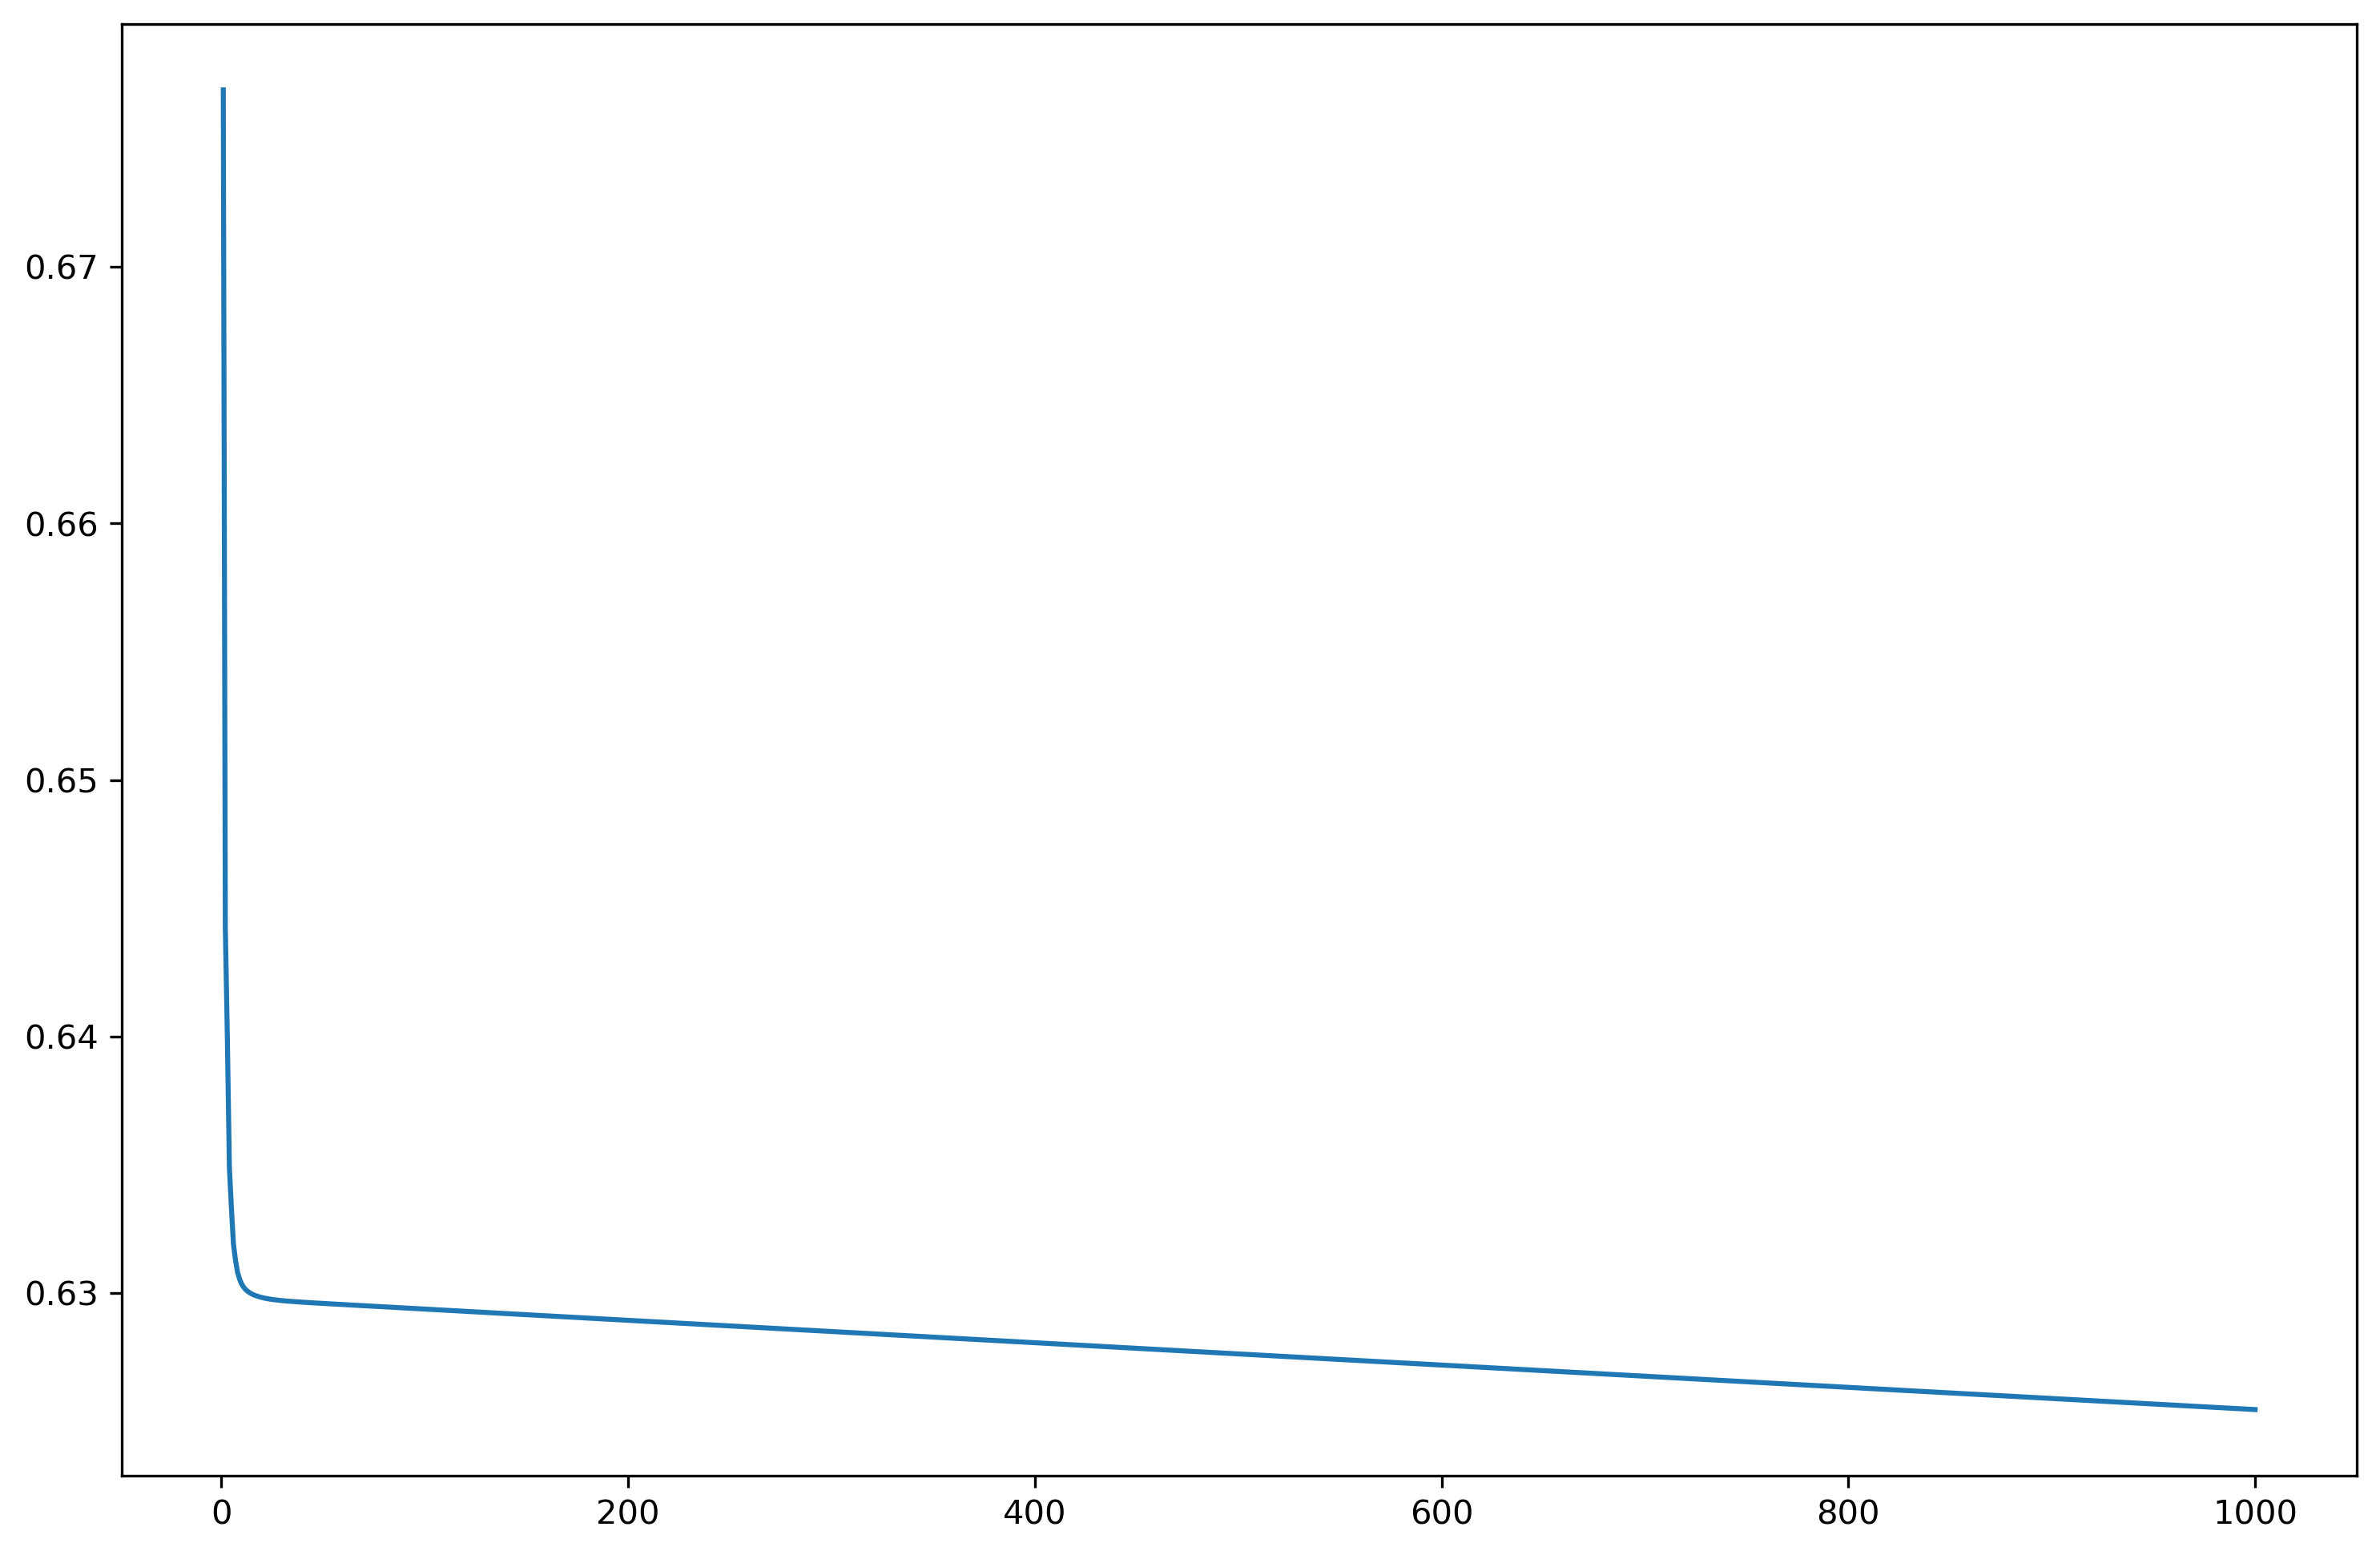

In [534]:
iter_num = 1000
theta,cost = logistic_regression_gradient_descent(X,y,iter_num,0.0009)
print(theta)
print(theta.shape)
print(cost[-1])

plt.clf()
plt.figure(dpi=300,figsize=(12,8))
plt.plot(range(1,iter_num+1),cost)

### plot decision boundary


<Figure size 432x288 with 0 Axes>

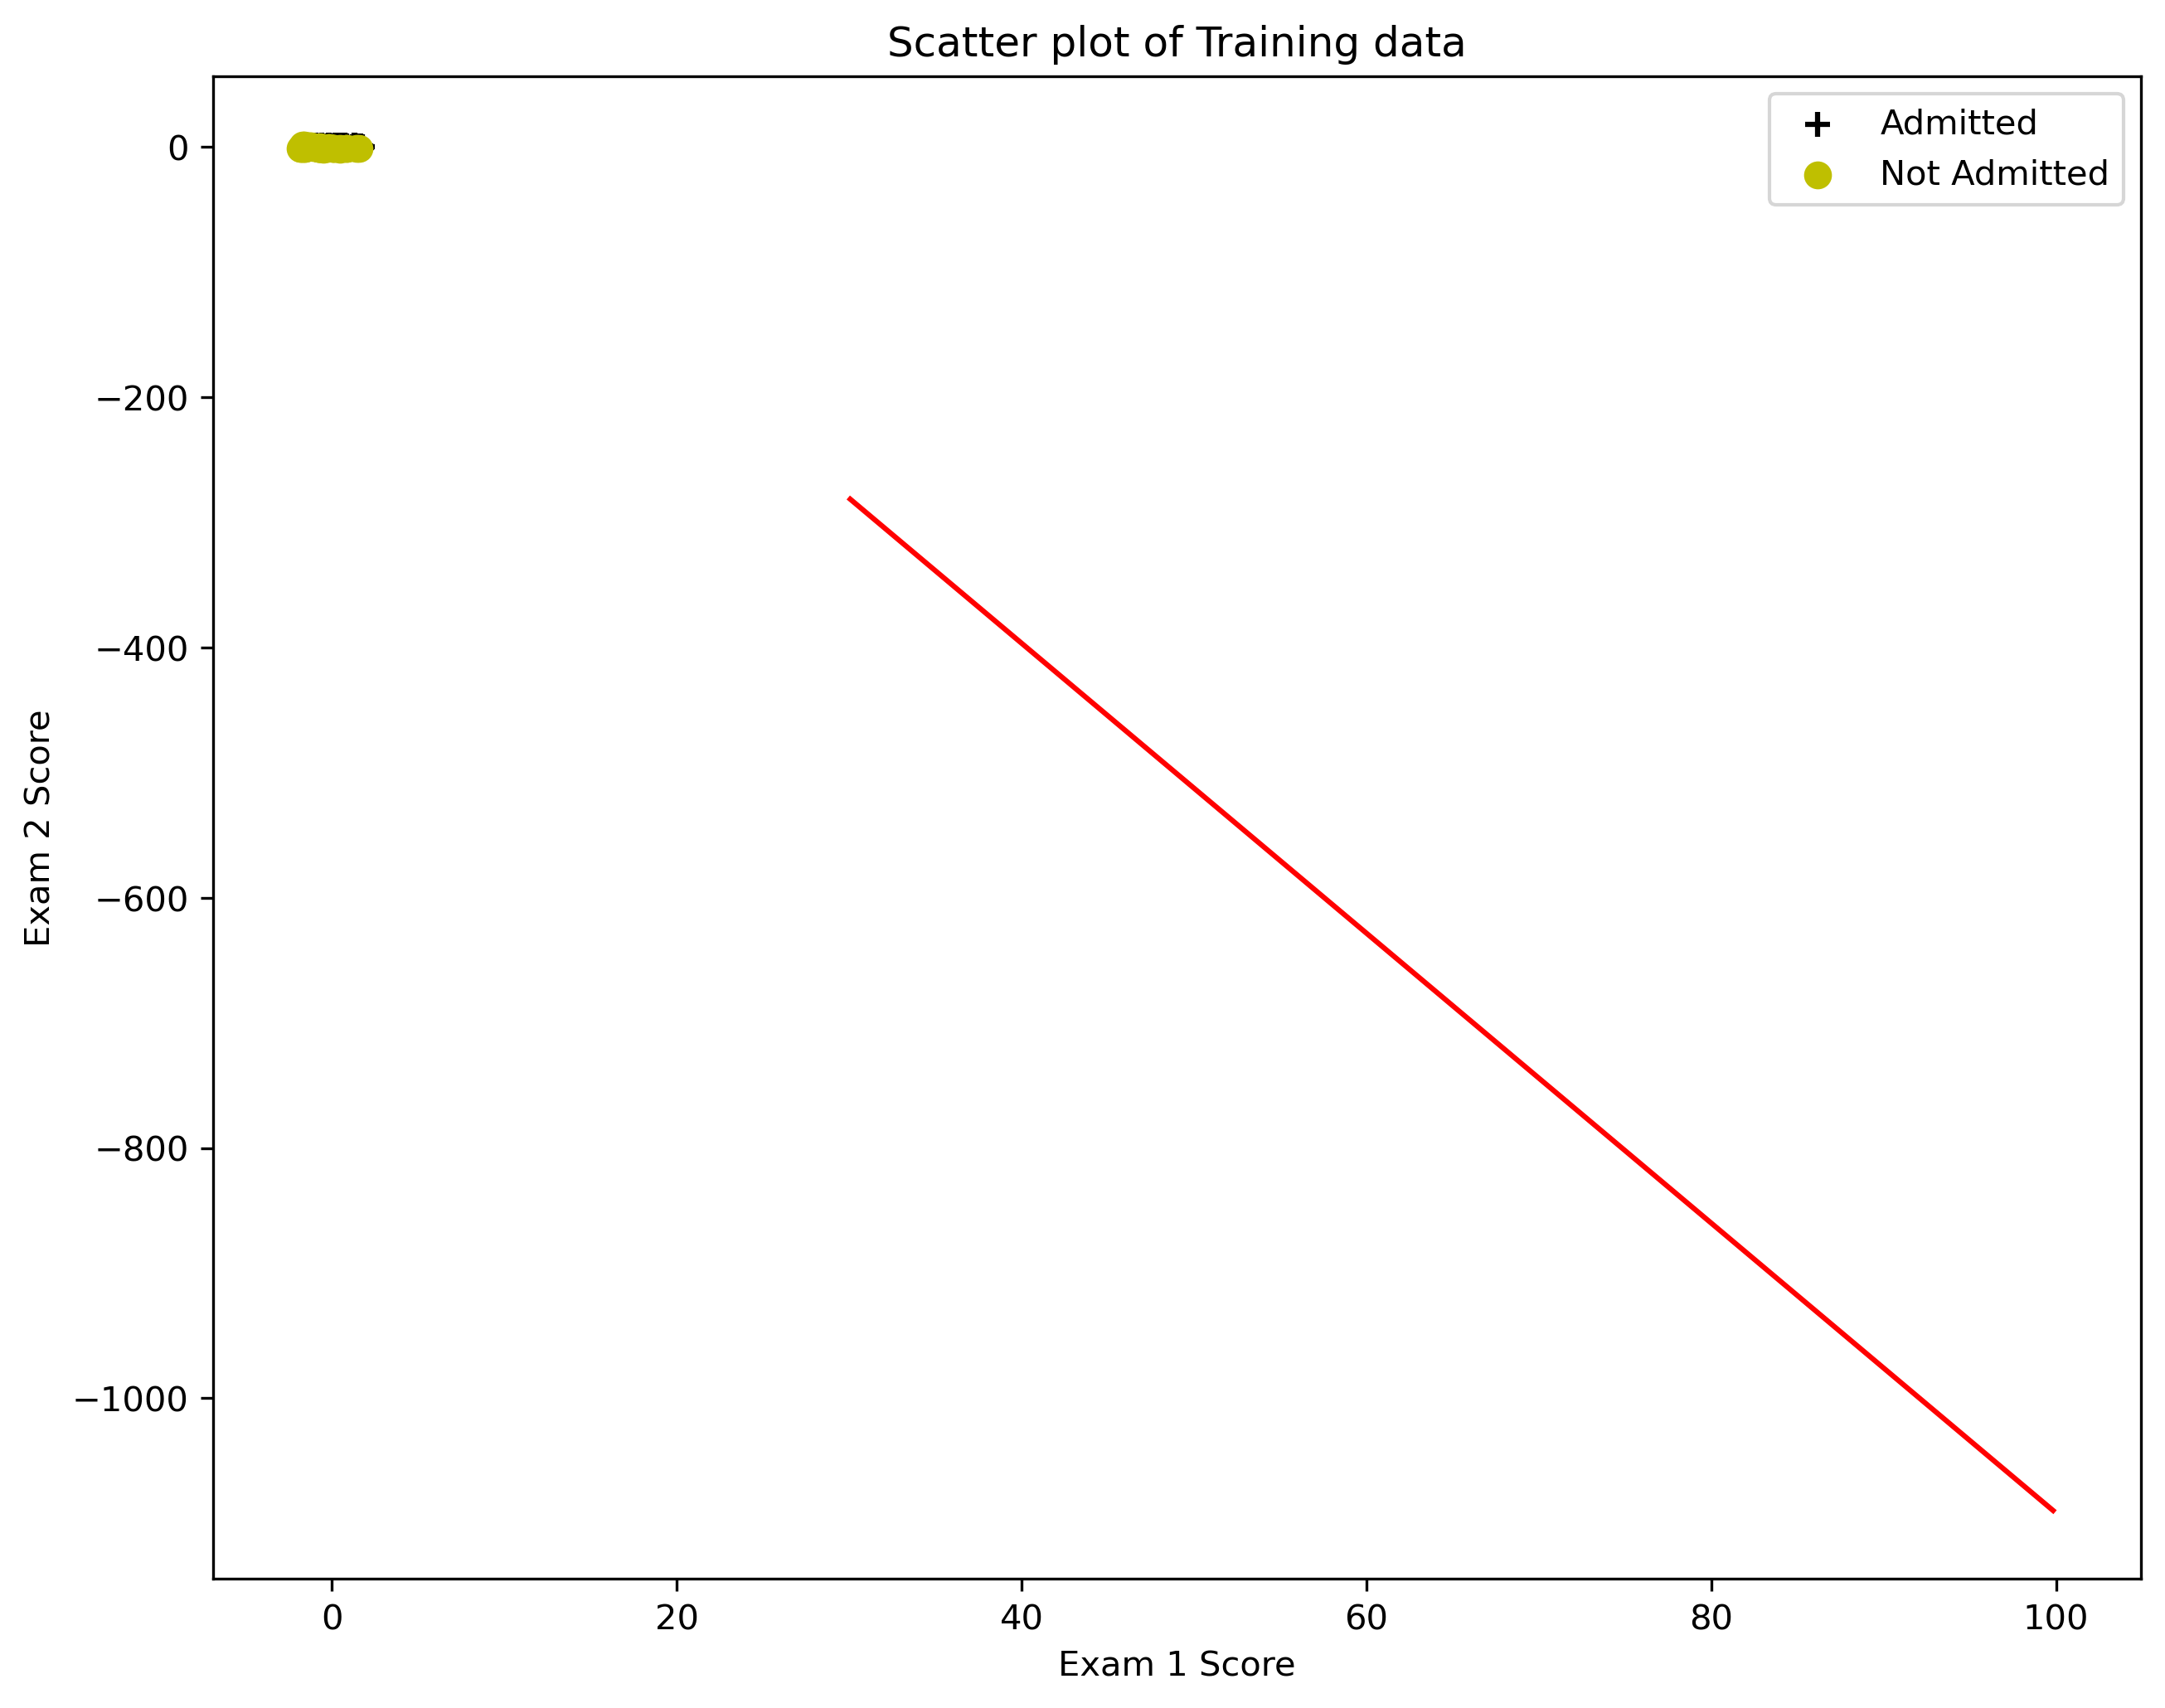

In [535]:
x = np.linspace(df.Exam1.min(), df.Exam1.max(), X.shape[0])
f = ( theta[0,0]+ (x*theta[1,0]) ) / -theta[2,0]
plt.clf()
plt.figure(dpi=300,figsize=(10,8))
plt.scatter(positive_df["Exam1"],positive_df["Exam2"],marker='+',c='black',s=50,label="Admitted")
plt.scatter(negative_df["Exam1"],negative_df["Exam2"],marker='o',c='y',s=50,label="Not Admitted")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.title("Scatter plot of Training data")
plt.legend()
# print(f)
plt.plot(x,f,'r',label='Prediction')

### implementation with scipy

(array([-25.16131854,   0.20623159,   0.20147149]), 36, 0)
0.20349770158947492


<Figure size 432x288 with 0 Axes>

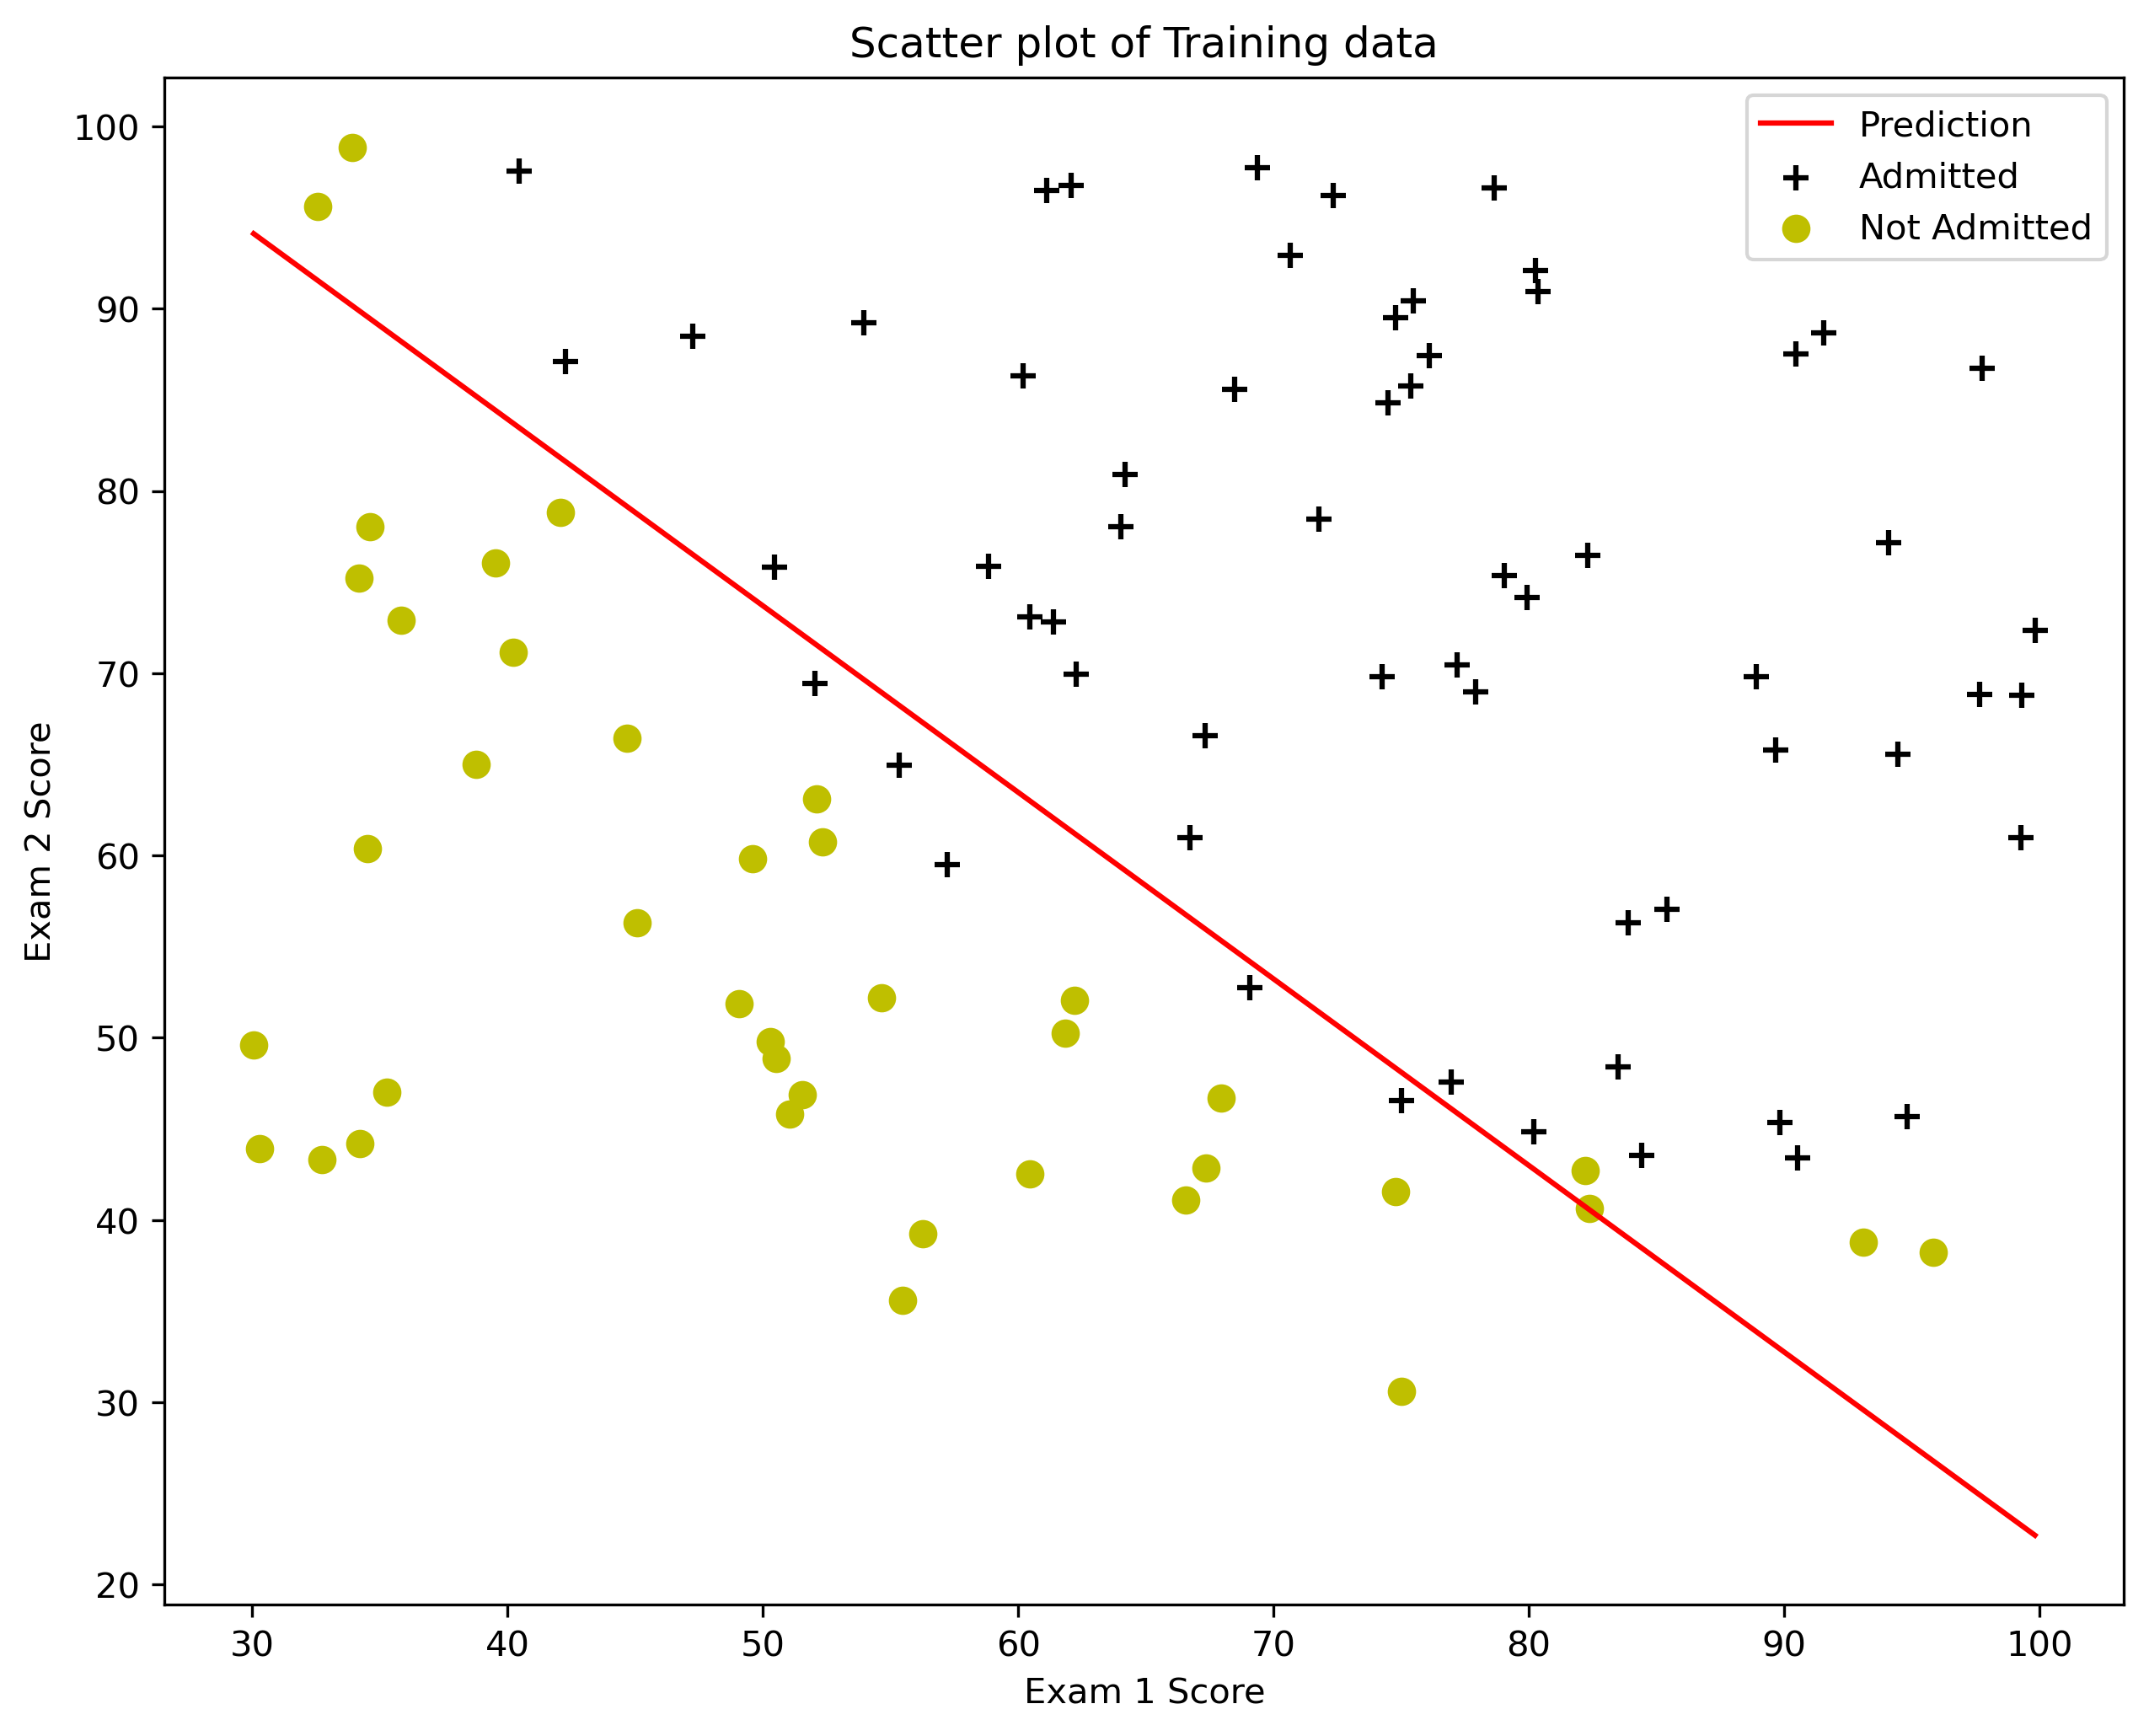

In [541]:
import scipy.optimize as opt

X = np.mat(df[["ones","Exam1","Exam2"]])
y = np.mat(df["Admitted"]).T
theta = np.zeros(X.shape[1])

# opt.fmin_tnc会把变量x0当作np.array处理，所以在写函数时要做相应处理
result = opt.fmin_tnc(func=cost_comput,x0=theta,fprime=gradient,args=(X,y))
print(result)
theta = result[0]
print(cost_comput(theta,X,y))
theta = np.mat(result[0]).T


x = np.linspace(df.Exam1.min(), df.Exam1.max(), X.shape[0])
f = ( theta[0,0]+ (x*theta[1,0]) ) / -theta[2,0]
plt.clf()
plt.figure(dpi=300,figsize=(10,8))
plt.scatter(positive_df["Exam1"],positive_df["Exam2"],marker='+',c='black',s=50,label="Admitted")
plt.scatter(negative_df["Exam1"],negative_df["Exam2"],marker='o',c='y',s=50,label="Not Admitted")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.title("Scatter plot of Training data")
plt.plot(x,f,'r',label='Prediction')
plt.legend()
# print(f)


### gradient descent with feature scaling
进行特征缩放后：1.代价函数可以在学习率较大的情况下开始收敛。2.最终收敛所需的迭代次数非常少（收敛快）
#### 关于归一化
1.归一化是一种线性变换，它不会改变数据集的很多性质  
2.使用训练集的数据进行归一化，即使用训练集中均值和标准差进行归一化，称为归一化机制  
3.进行预测时，数据必须经过训练集归一化机制处理，如进行模型精度评估时，测试集数据必须归一化

0.20349773676821648


<Figure size 432x288 with 0 Axes>

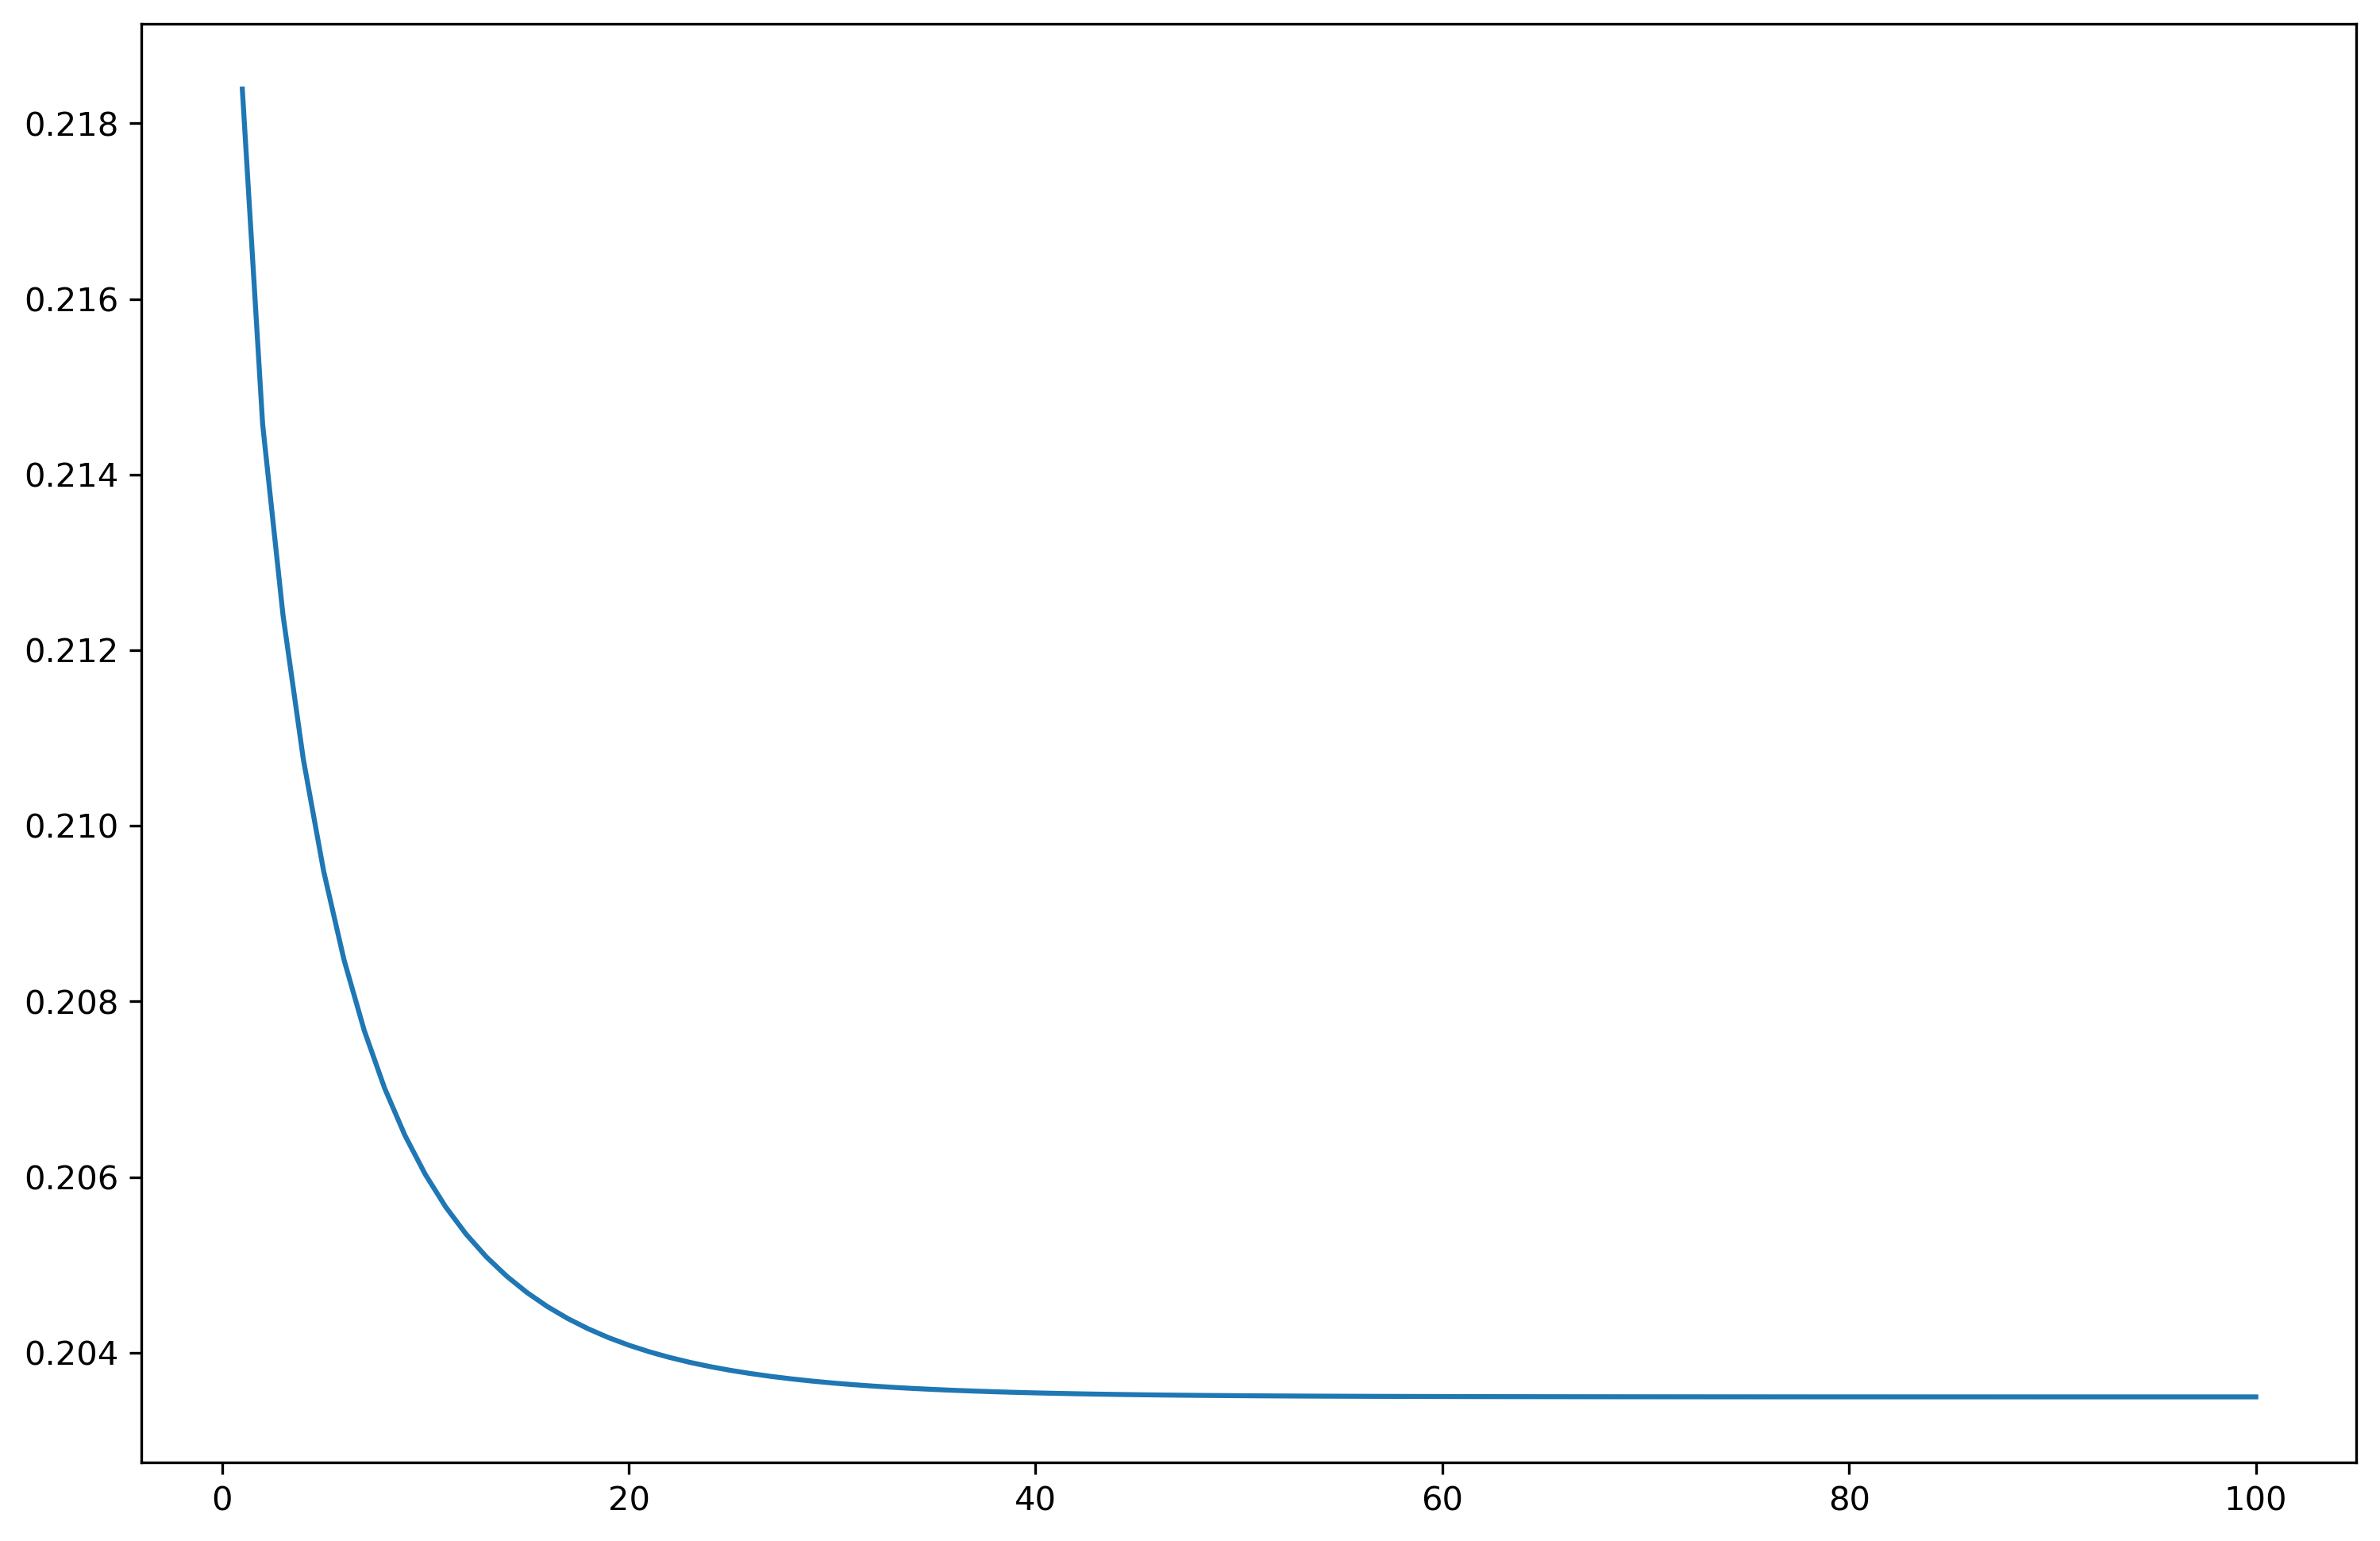

In [542]:
df = pd.read_csv("ex2data1.txt",header=None,names=["Exam1","Exam2","Admitted"])
X = df[["Exam1","Exam2"]]
X = ( X-X.mean() ) / X.std()
X.insert(0,"ones",1)
X = np.mat(X)
y = np.mat(df["Admitted"]).T

iter_num = 100
alpha = 10
theta,cost = logistic_regression_gradient_descent(X,y,iter_num,alpha)
plt.clf()
plt.figure(dpi=300,figsize=(12,8))
plt.plot(range(1,iter_num+1),cost)
print(cost[-1])

#### 特征缩放下的决策边界
必须在统一的归一化机制下画图

<Figure size 432x288 with 0 Axes>

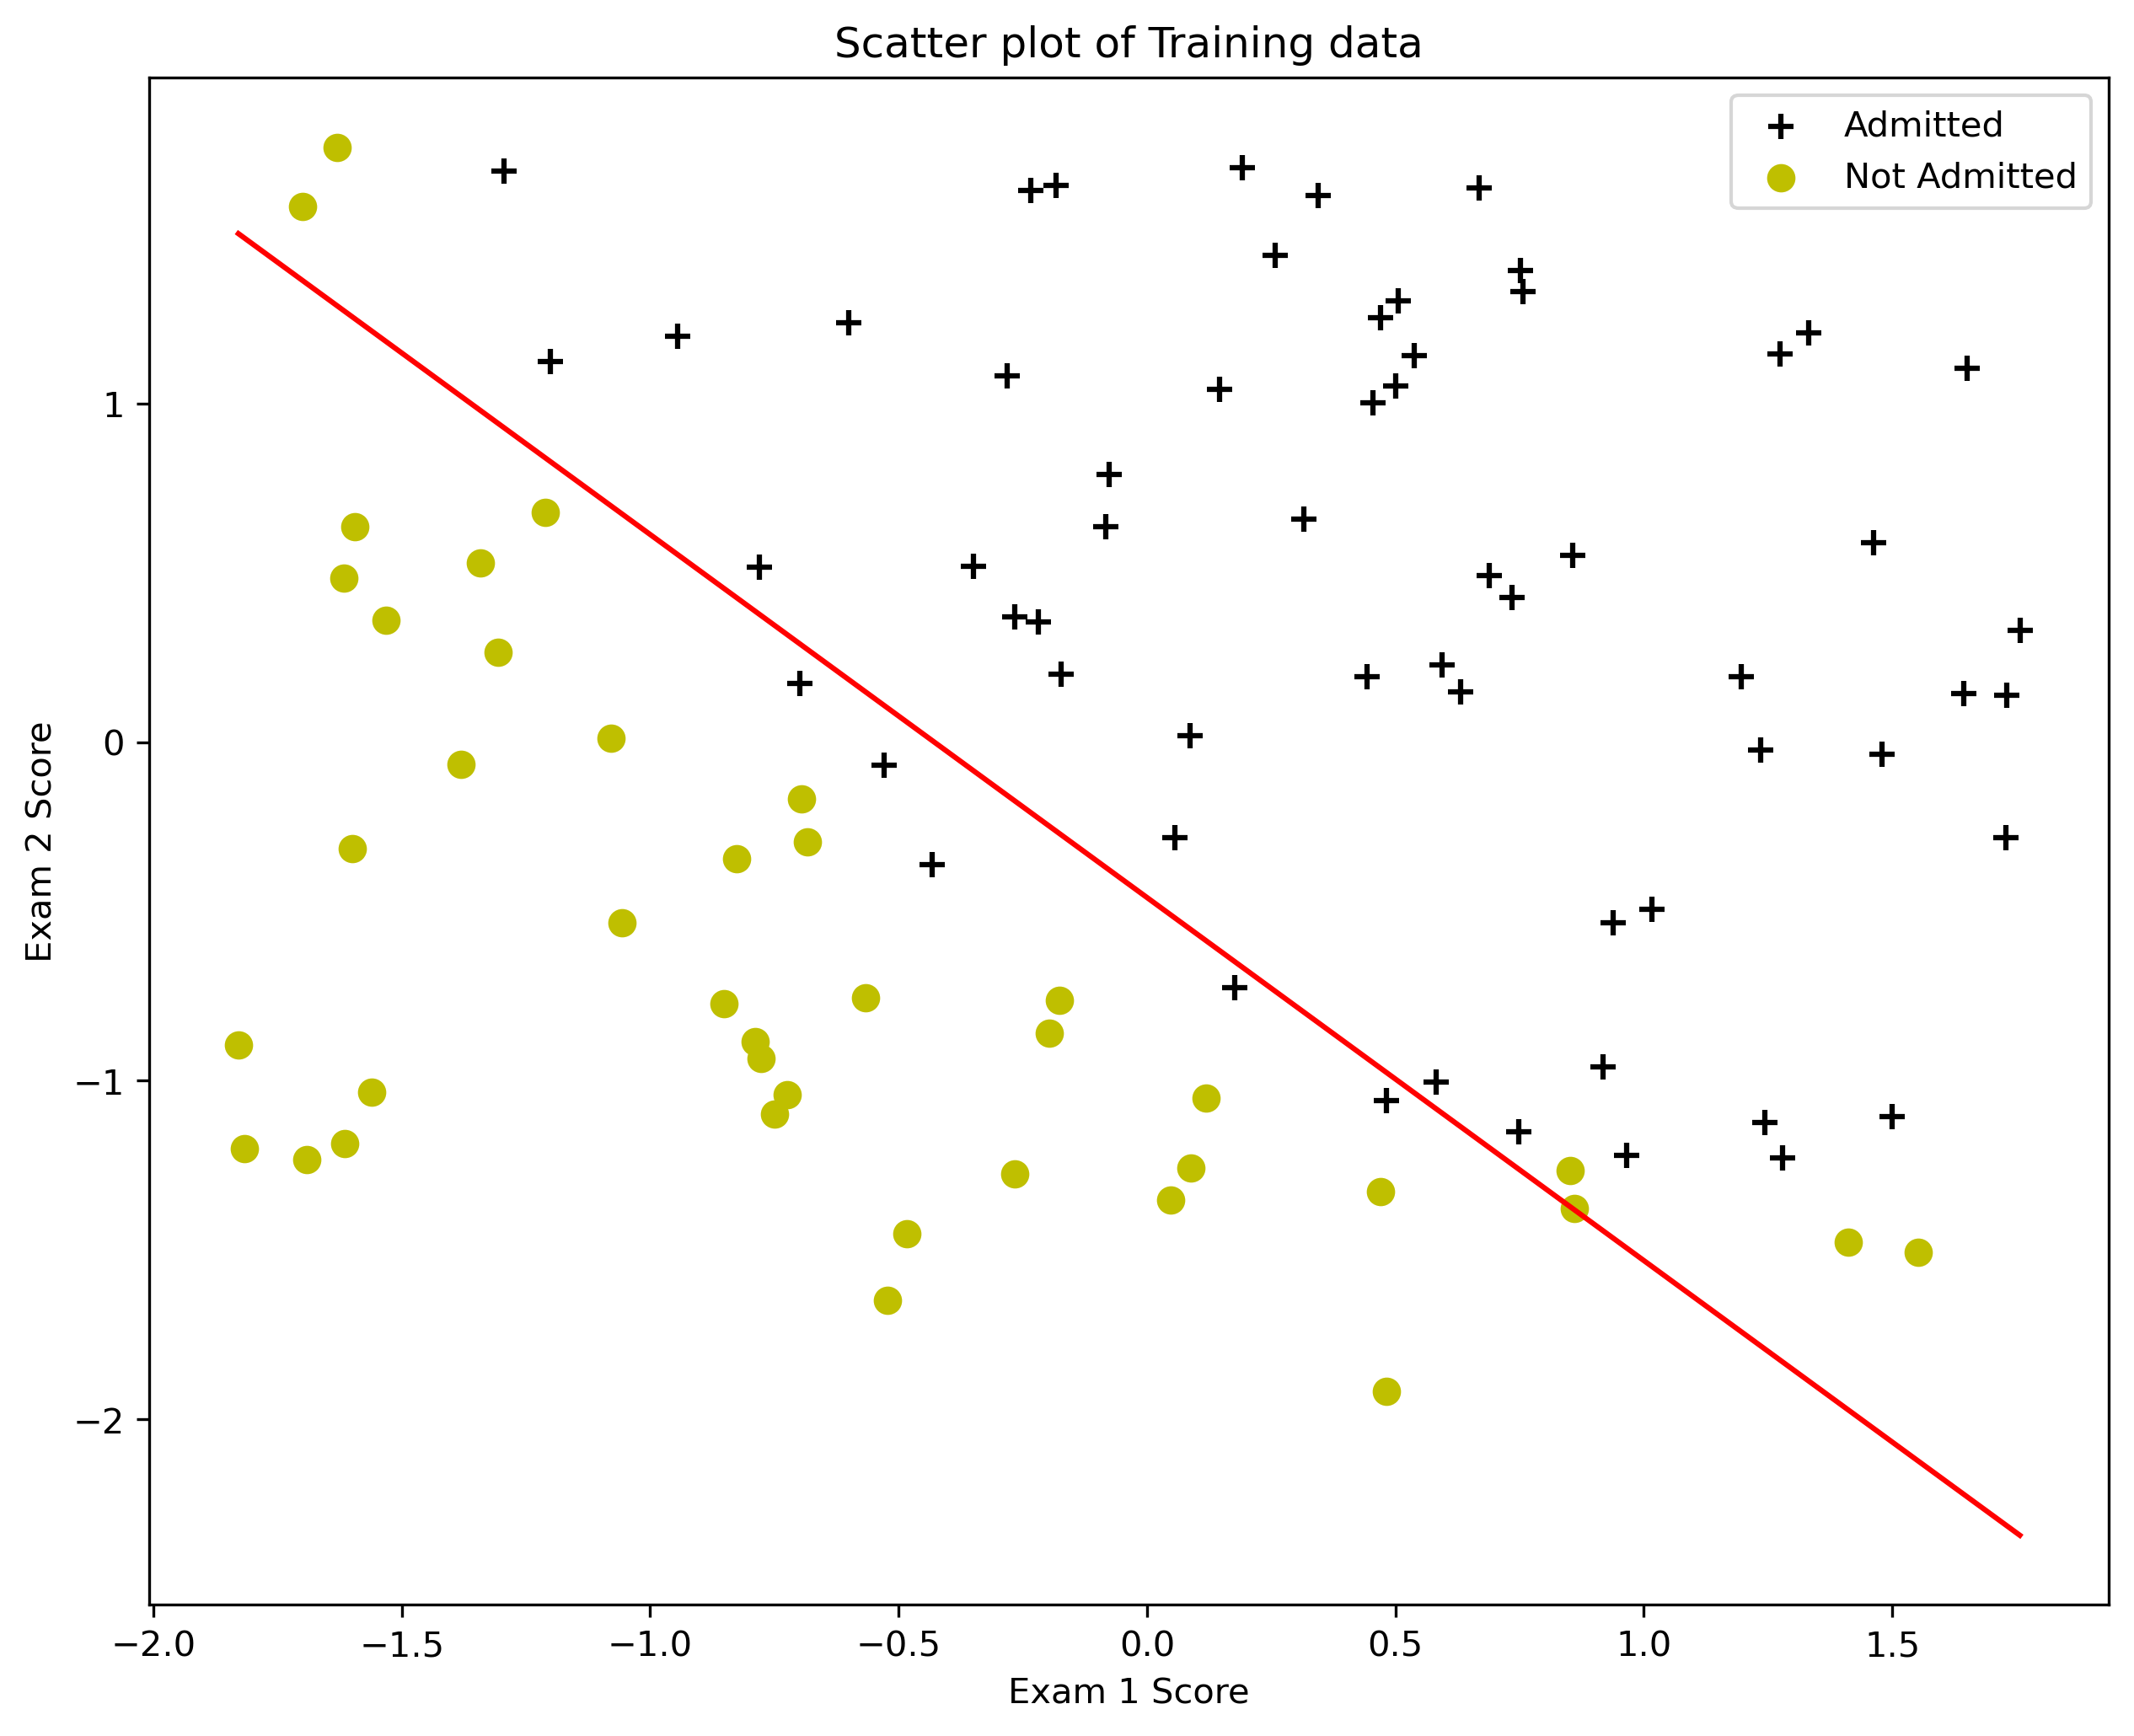

In [543]:
# X = np.array(X)
# print(X[:,1:3])
df_X = pd.DataFrame(X[:,1:3],columns=["Exam1","Exam2"])
positive_df = df_X[y == 1]
negative_df = df_X[y == 0]
x = np.linspace(df_X.Exam1.min(), df_X.Exam1.max(), df_X.shape[0])
f = ( theta[0,0]+ (x*theta[1,0]) ) / -theta[2,0]
plt.clf()
plt.figure(dpi=300,figsize=(10,8))
plt.scatter(positive_df["Exam1"],positive_df["Exam2"],marker='+',c='black',s=50,label="Admitted")
plt.scatter(negative_df["Exam1"],negative_df["Exam2"],marker='o',c='y',s=50,label="Not Admitted")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.title("Scatter plot of Training data")
plt.legend()
# print(f)
plt.plot(x,f,'r',label='Prediction')

#### 特征缩放下在原数据尺度下的决策边界


0.20349773676821648


<Figure size 432x288 with 0 Axes>

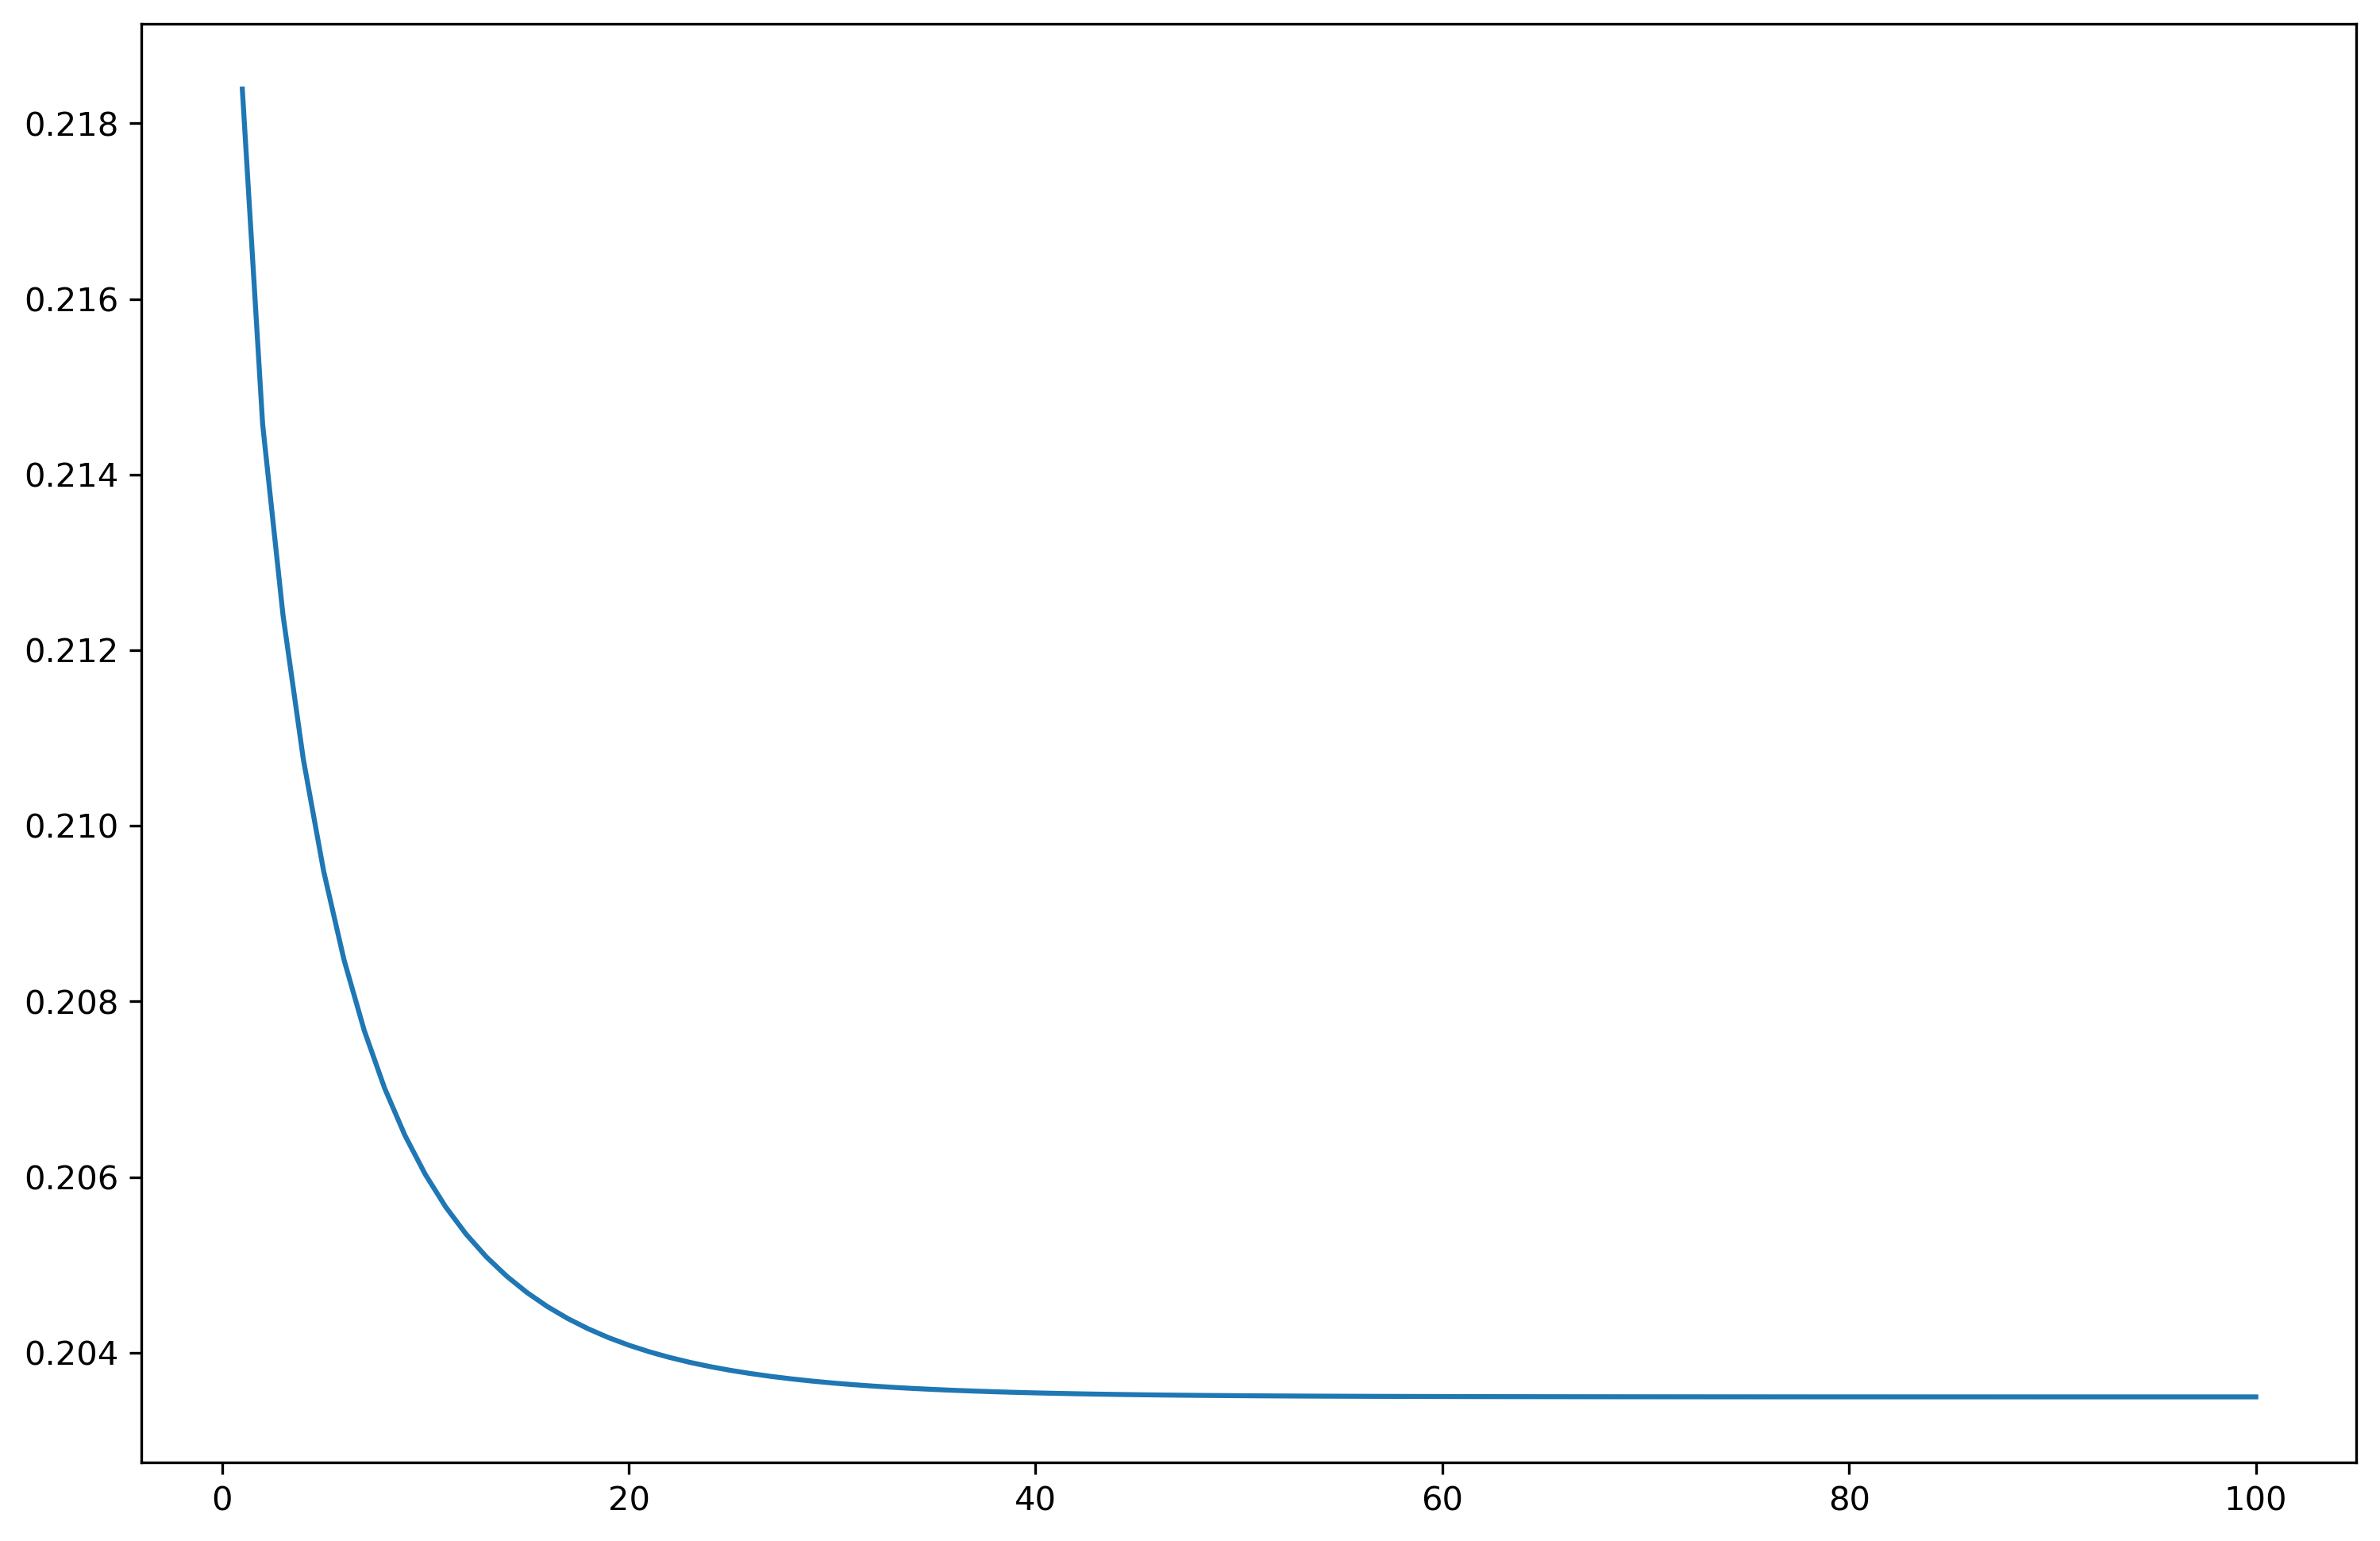

In [544]:
df_data = pd.read_csv("ex2data1.txt",header=None,names=["Exam1","Exam2","Admitted"])

df_X = df_data[["Exam1","Exam2"]]
df_y = df_data["Admitted"]
df_norm_X = ( df_X-df_X.mean() )/ df_X.std()
df_norm_X.insert(0,"Ones",1)
mat_norm_X = np.mat(df_norm_X)
mat_y = np.mat(df_y).T
iter_num = 100
alpha = 10
theta,cost = logistic_regression_gradient_descent(mat_norm_X,mat_y,iter_num,alpha)
print(cost[-1])


plt.clf()
plt.figure(dpi=300,figsize=(12,8))
plt.plot(range(1,iter_num+1),cost)

<Figure size 432x288 with 0 Axes>

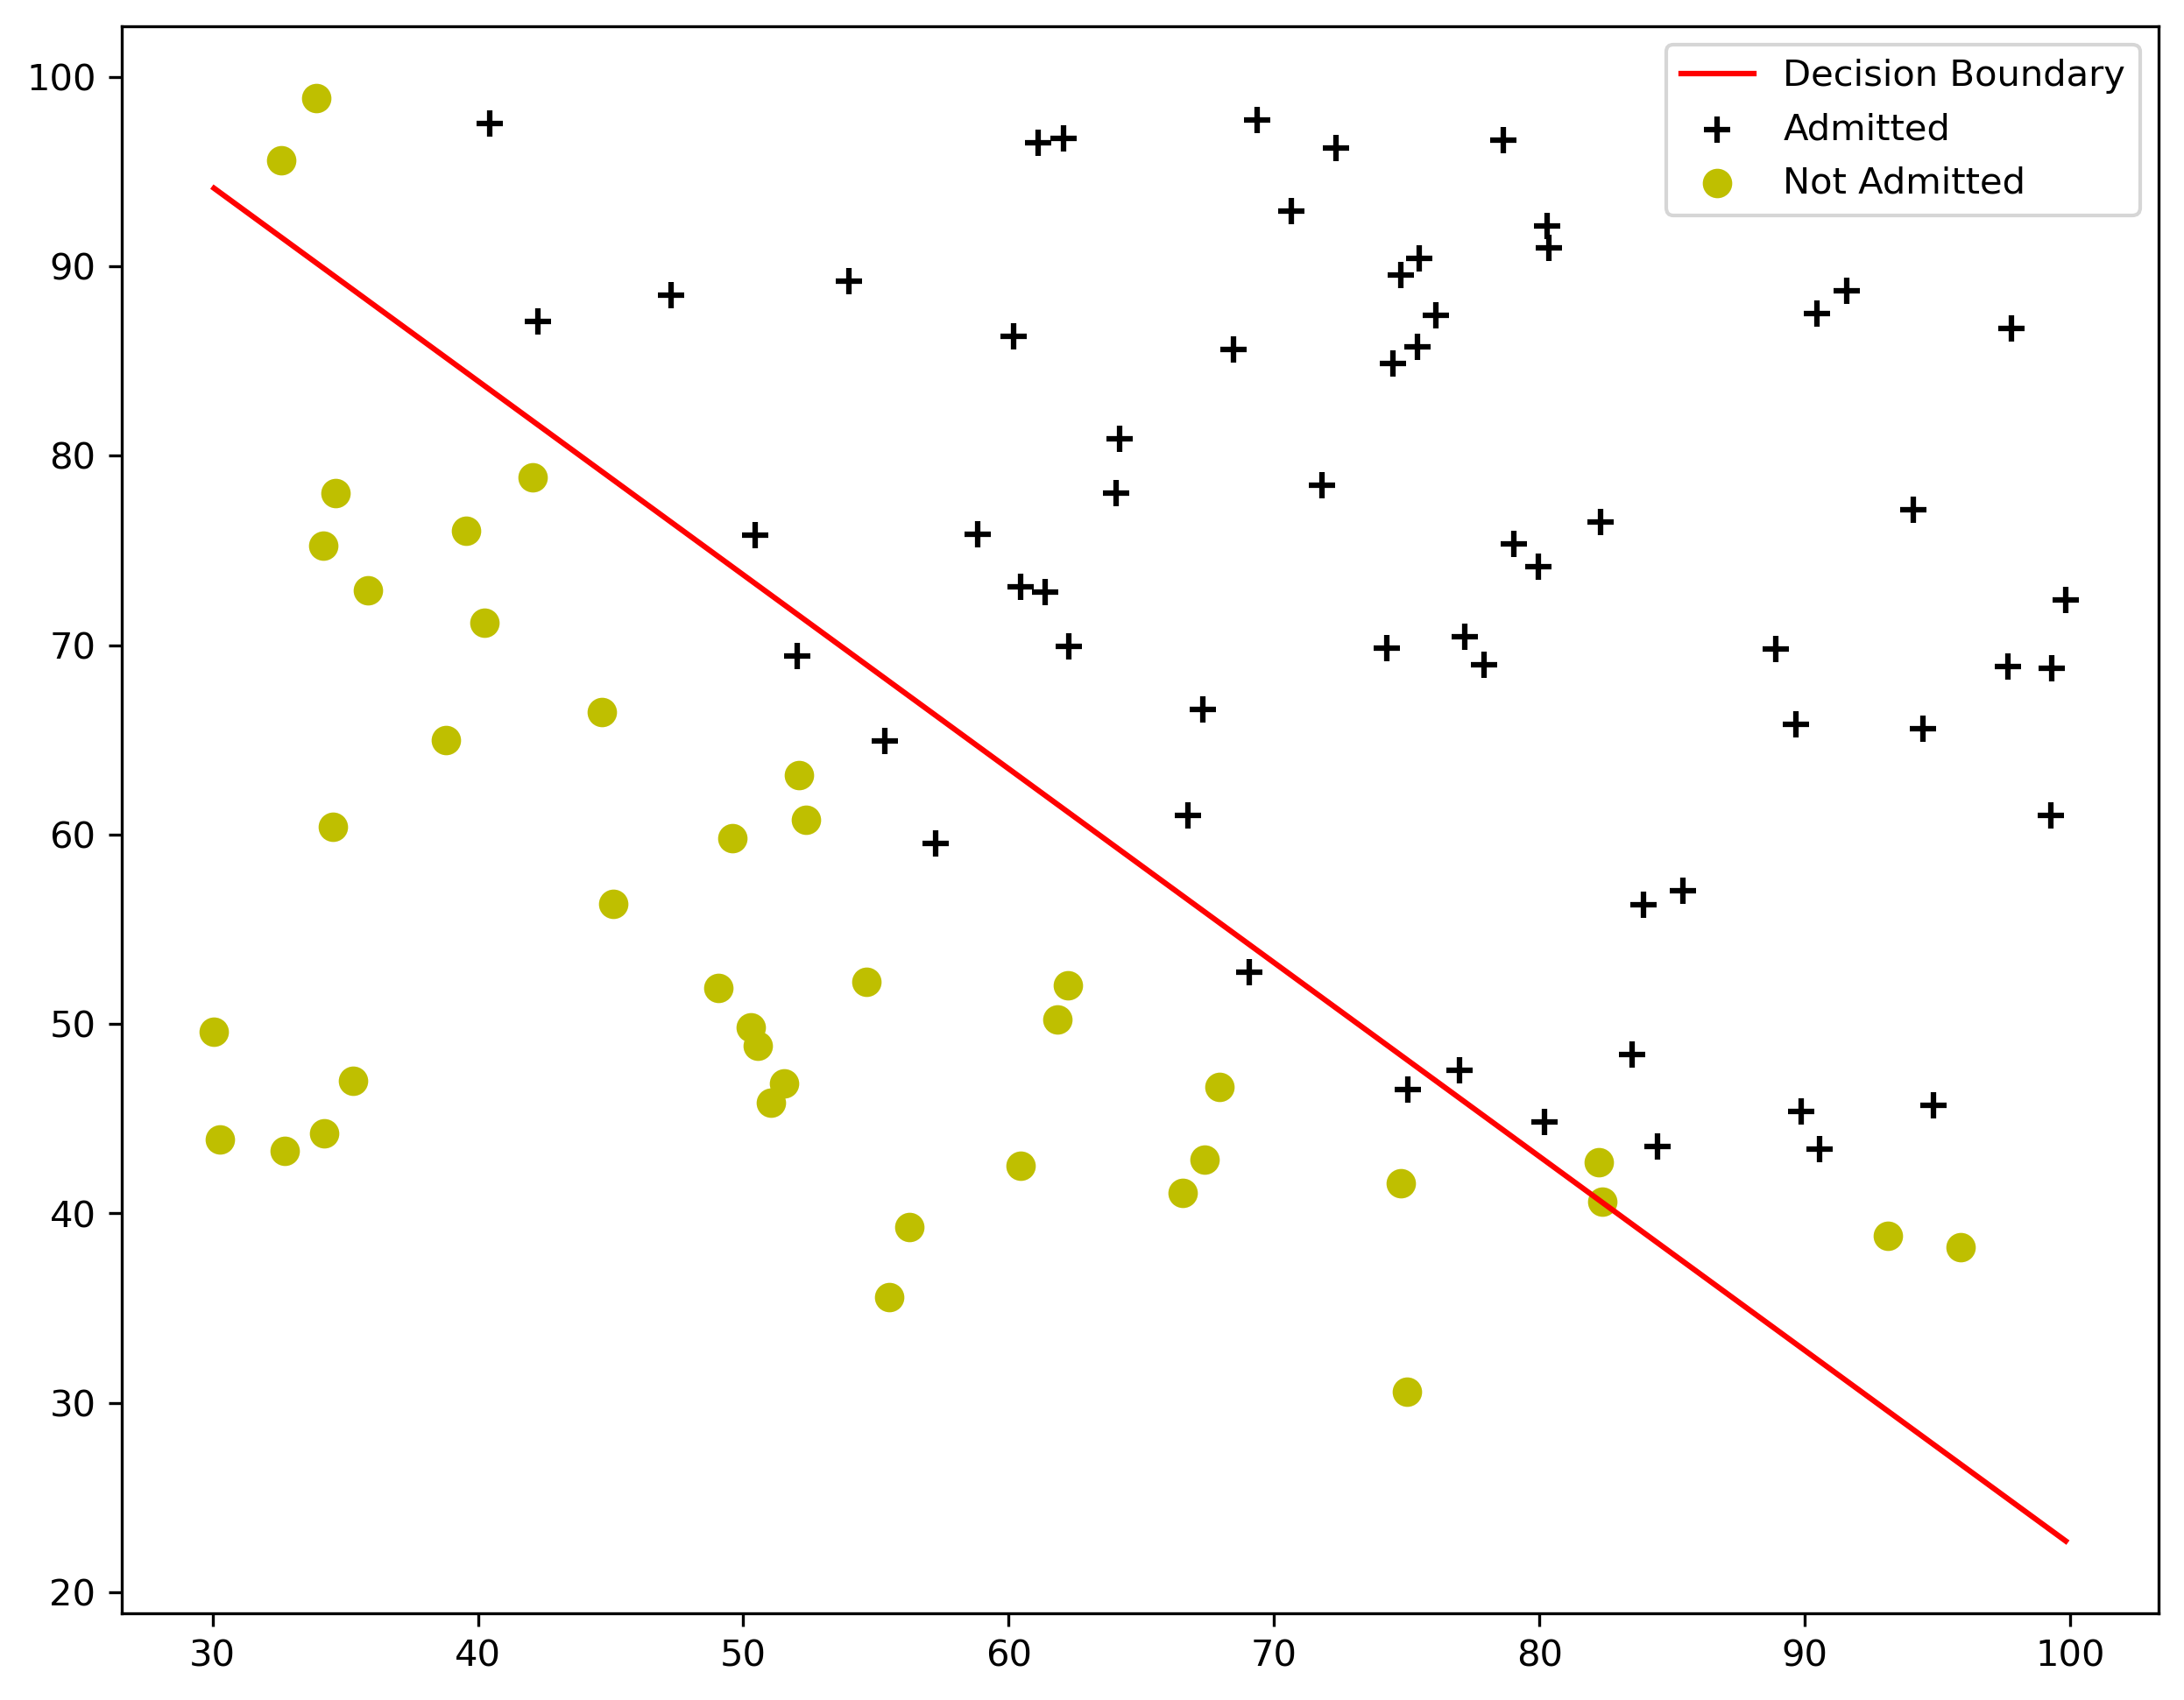

In [545]:
x = np.linspace(df_norm_X["Exam1"].min(),df_norm_X["Exam1"].max(),len(df_norm_X["Exam1"]))
f = (theta[0,0] + theta[1,0]*x) / -theta[2,0]
x = x * df_X["Exam1"].std() + df_X["Exam1"].mean()
f = f * df_X["Exam2"].std() + df_X["Exam2"].mean()
positive_X = df_X[df_y==1]
negative_X = df_X[df_y==0]
plt.clf()
plt.figure(dpi=300,figsize=(10,8))
plt.scatter(positive_X["Exam1"],positive_X["Exam2"],marker="+",s=50,c='black',label="Admitted")
plt.scatter(negative_X["Exam1"],negative_X["Exam2"],marker="o",s=50,c='y',label="Not Admitted")
plt.plot(x,f,label="Decision Boundary",c='r')
plt.legend()

### Prediction/Evaluating logistic regression
After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.776.

In [546]:
def prediction(exam1,exam2,normalization=False):
    if normalization:
        theta_X = (exam1-df_X["Exam1"].mean()) / df_X["Exam1"].std() * theta[1,0] \
            + (exam2-df_X["Exam2"].mean()) / df_X["Exam2"].std() * theta[2,0] \
            + theta[0,0]
    else :
        theta_X = exam1 * theta[1,0] + exam2 * theta[2,0] + theta[0,0]
    prob = np.array(sigmoid(theta_X))
    predict = (prob>=0.5).astype(np.int)
    return prob,predict

prediction(45,85,True)

(array(0.77613222), 1)

#### Model Accuracy
Another way to evaluate the quality of the parameters we have found
is to see how well the learned model predicts on our training set.

In [547]:
def model_accuracy(predict,y):
    m = y.shape[0]
    return ( m - int(sum((predict ^ y.T).T)) )/m
prob,predict = prediction(df_X["Exam1"],df_X["Exam2"],True)
model_accuracy(predict,mat_y)

0.89

## multi-variable logistic regression
In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.  
Suppose you are the product manager of the factory and you have the
test results for some microchips on two different tests. From these two tests,you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

In [549]:
df_data = pd.read_csv("ex2data2.txt",header=None,names=["Test1","Test2","Passed_QA"])
df_data.head()

,Test1,Test2,Passed_QA
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


### visualizing the data

Text(0.5, 1.0, 'Training Data')

<Figure size 432x288 with 0 Axes>

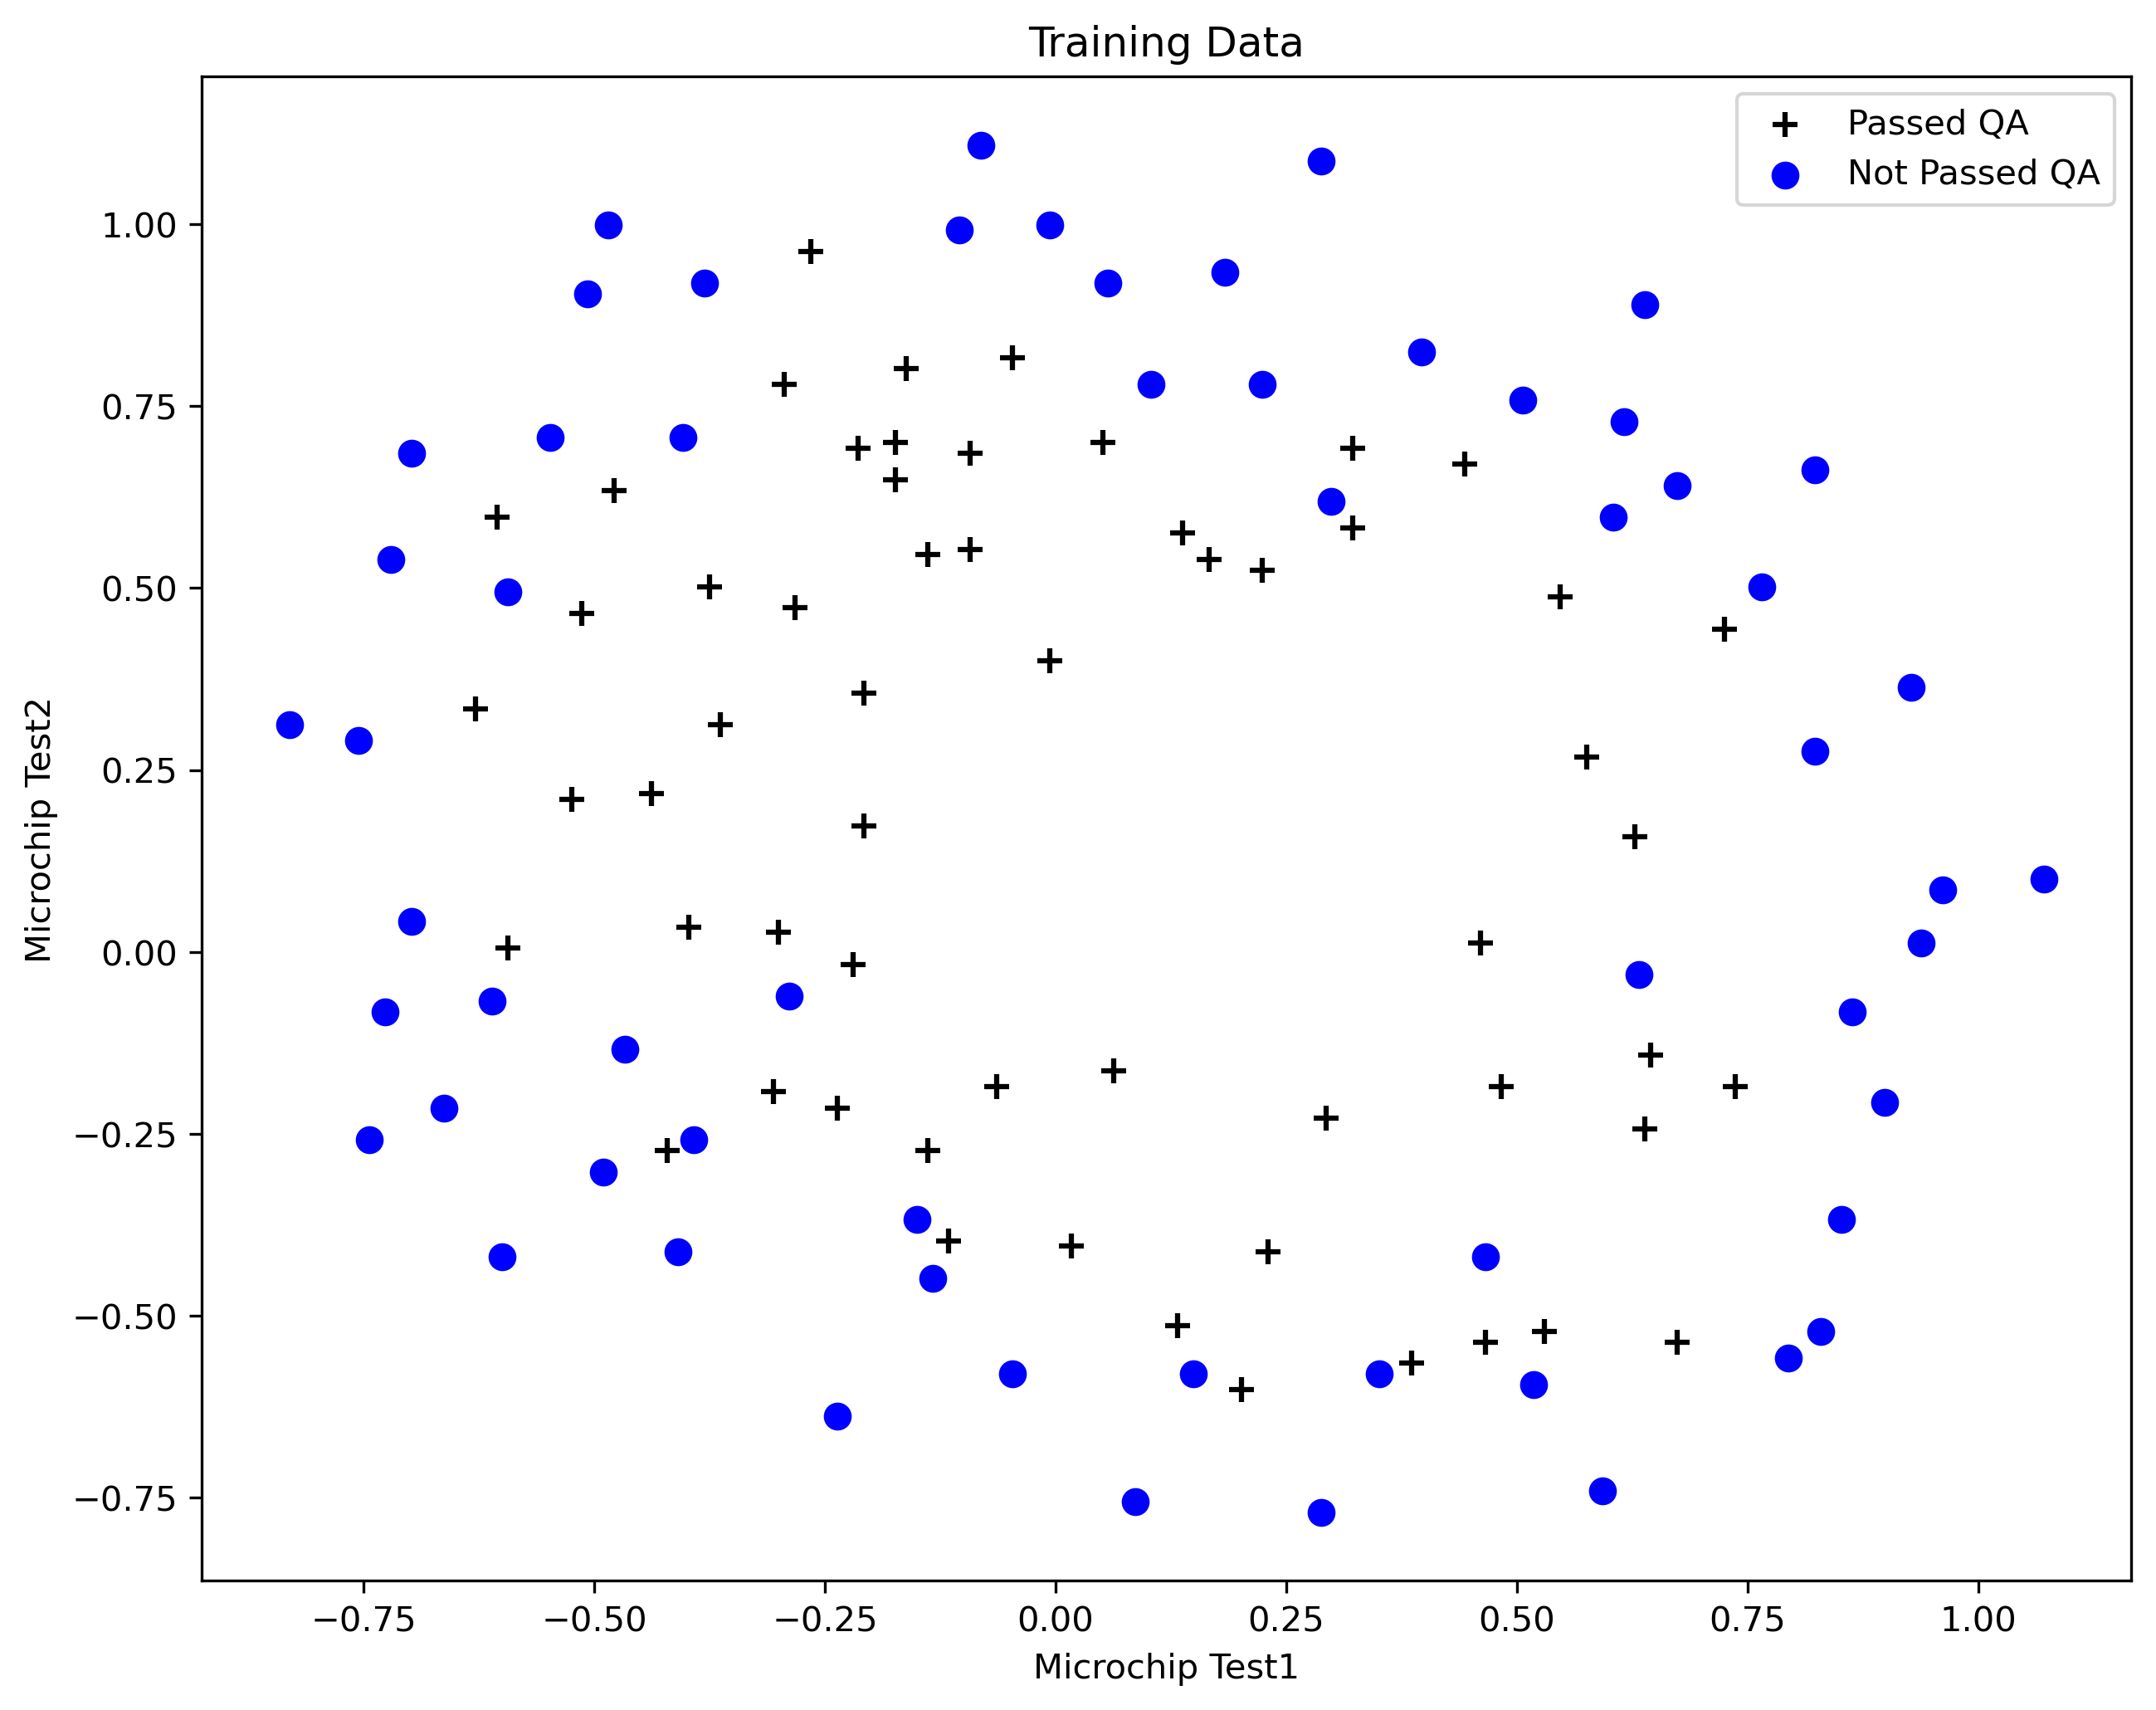

In [550]:
positive_X = df_data[df_data["Passed_QA"]==1]
negative_X = df_data[df_data["Passed_QA"]==0]
plt.clf()
plt.figure(dpi=300,figsize=(10,8))
plt.scatter(positive_X["Test1"],positive_X["Test2"],marker="+",c="black",s=50,label="Passed QA")
plt.scatter(negative_X["Test1"],negative_X["Test2"],marker="o",c="b",s=50,label="Not Passed QA")
plt.legend()
plt.xlabel("Microchip Test1")
plt.ylabel("Microchip Test2")
plt.title("Training Data")

### Feature Mapping
One way to fit the data better is to create more features from each data point. We will map the features into all polynomial terms of x1 and x2 up to the sixth power.

In [580]:
def feature_mapping(X,degree,start_cols=1):
    X = np.array(X)      
    for i in range(0,degree+1):
        for j in range(0,degree-i+1):
            if(i==0 and j==0) or (i==0 and j==1) or (i==1 and j==0):
                continue
            X = np.c_[X,np.power(X[:,start_cols],i) \
                      * np.power(X[:,start_cols+1],j) ]
    return np.matrix(X)

df_X = df_data.drop(labels="Passed_QA",axis=1)
df_X.insert(0,"Ones",1)
df_y = df_data["Passed_QA"]
mat_X = np.mat(df_X)
mat_y = np.mat(df_y).T


mat_X = feature_mapping(mat_X,start_cols=1,degree=6)
print(mat_X.shape)

(118, 28)


0.279387711431147


<Figure size 432x288 with 0 Axes>

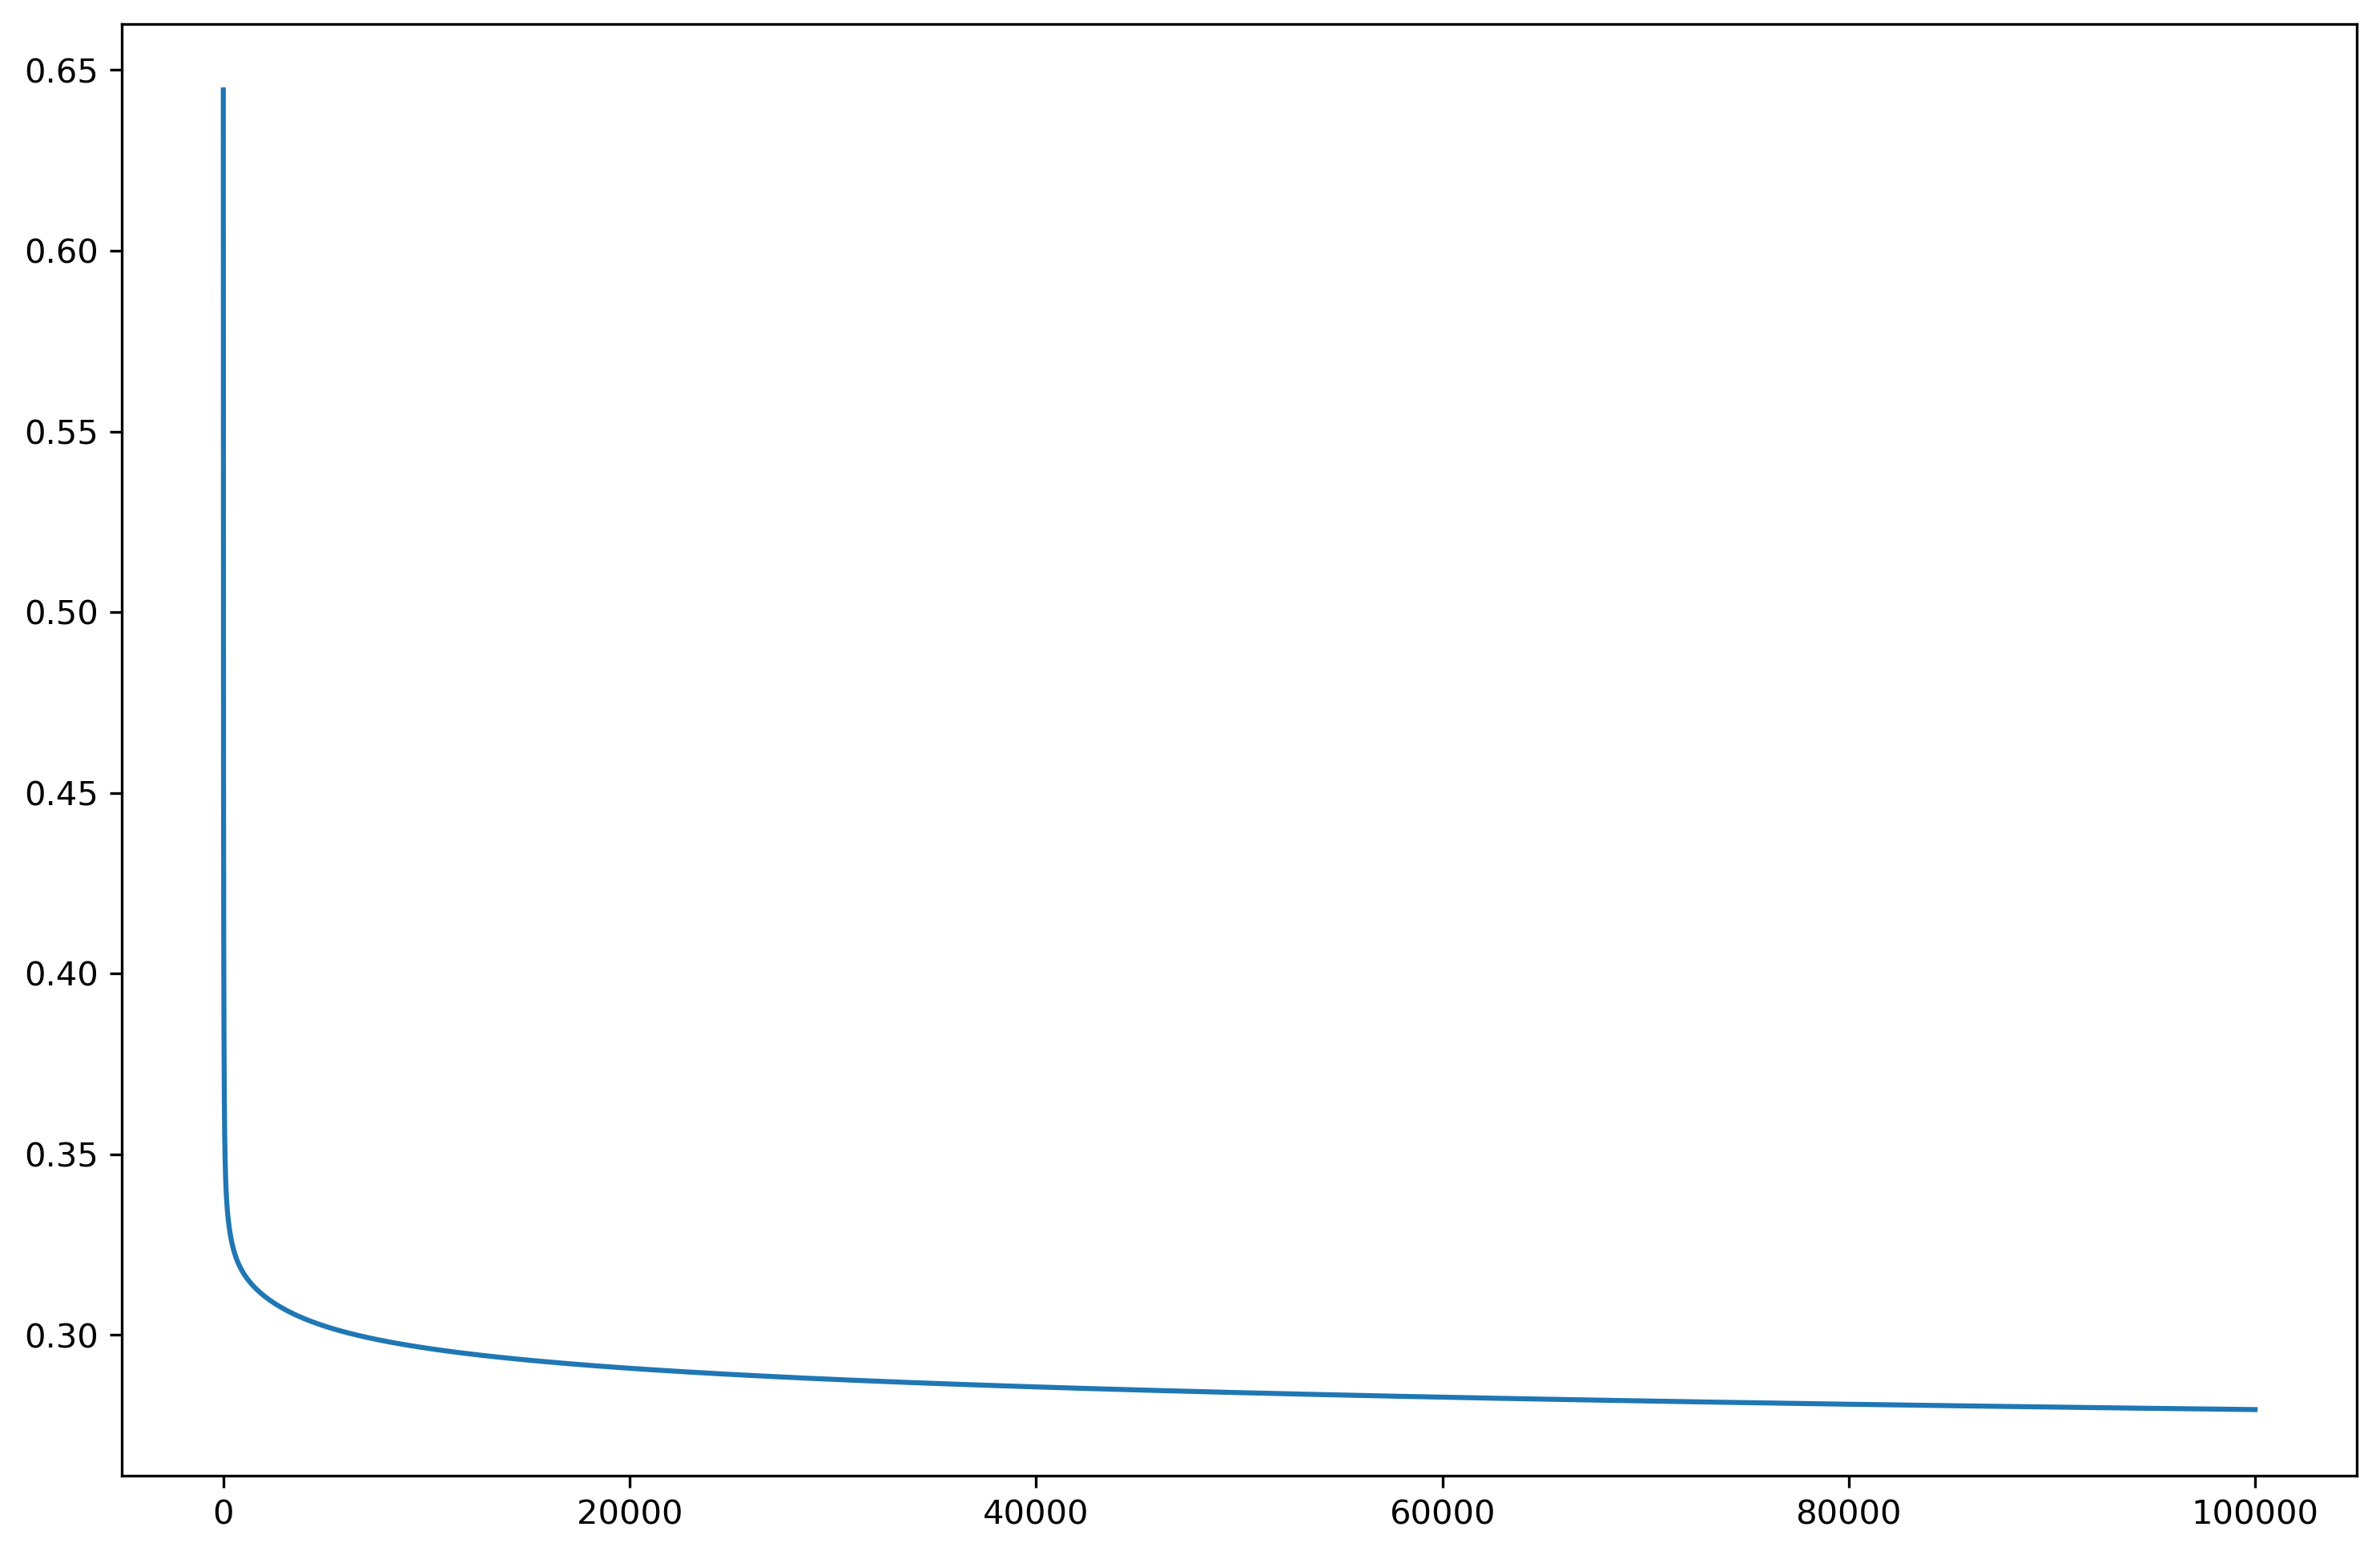

In [552]:
iter_num = 100000
alpha = 7.3
theta,cost = logistic_regression_gradient_descent(mat_X,mat_y,iter_num,alpha)
print(cost[-1])

plt.clf()
plt.figure(dpi=300,figsize=(12,8))
plt.plot(range(1,iter_num+1),cost)

### Plot Decision Boundary

<Figure size 432x288 with 0 Axes>

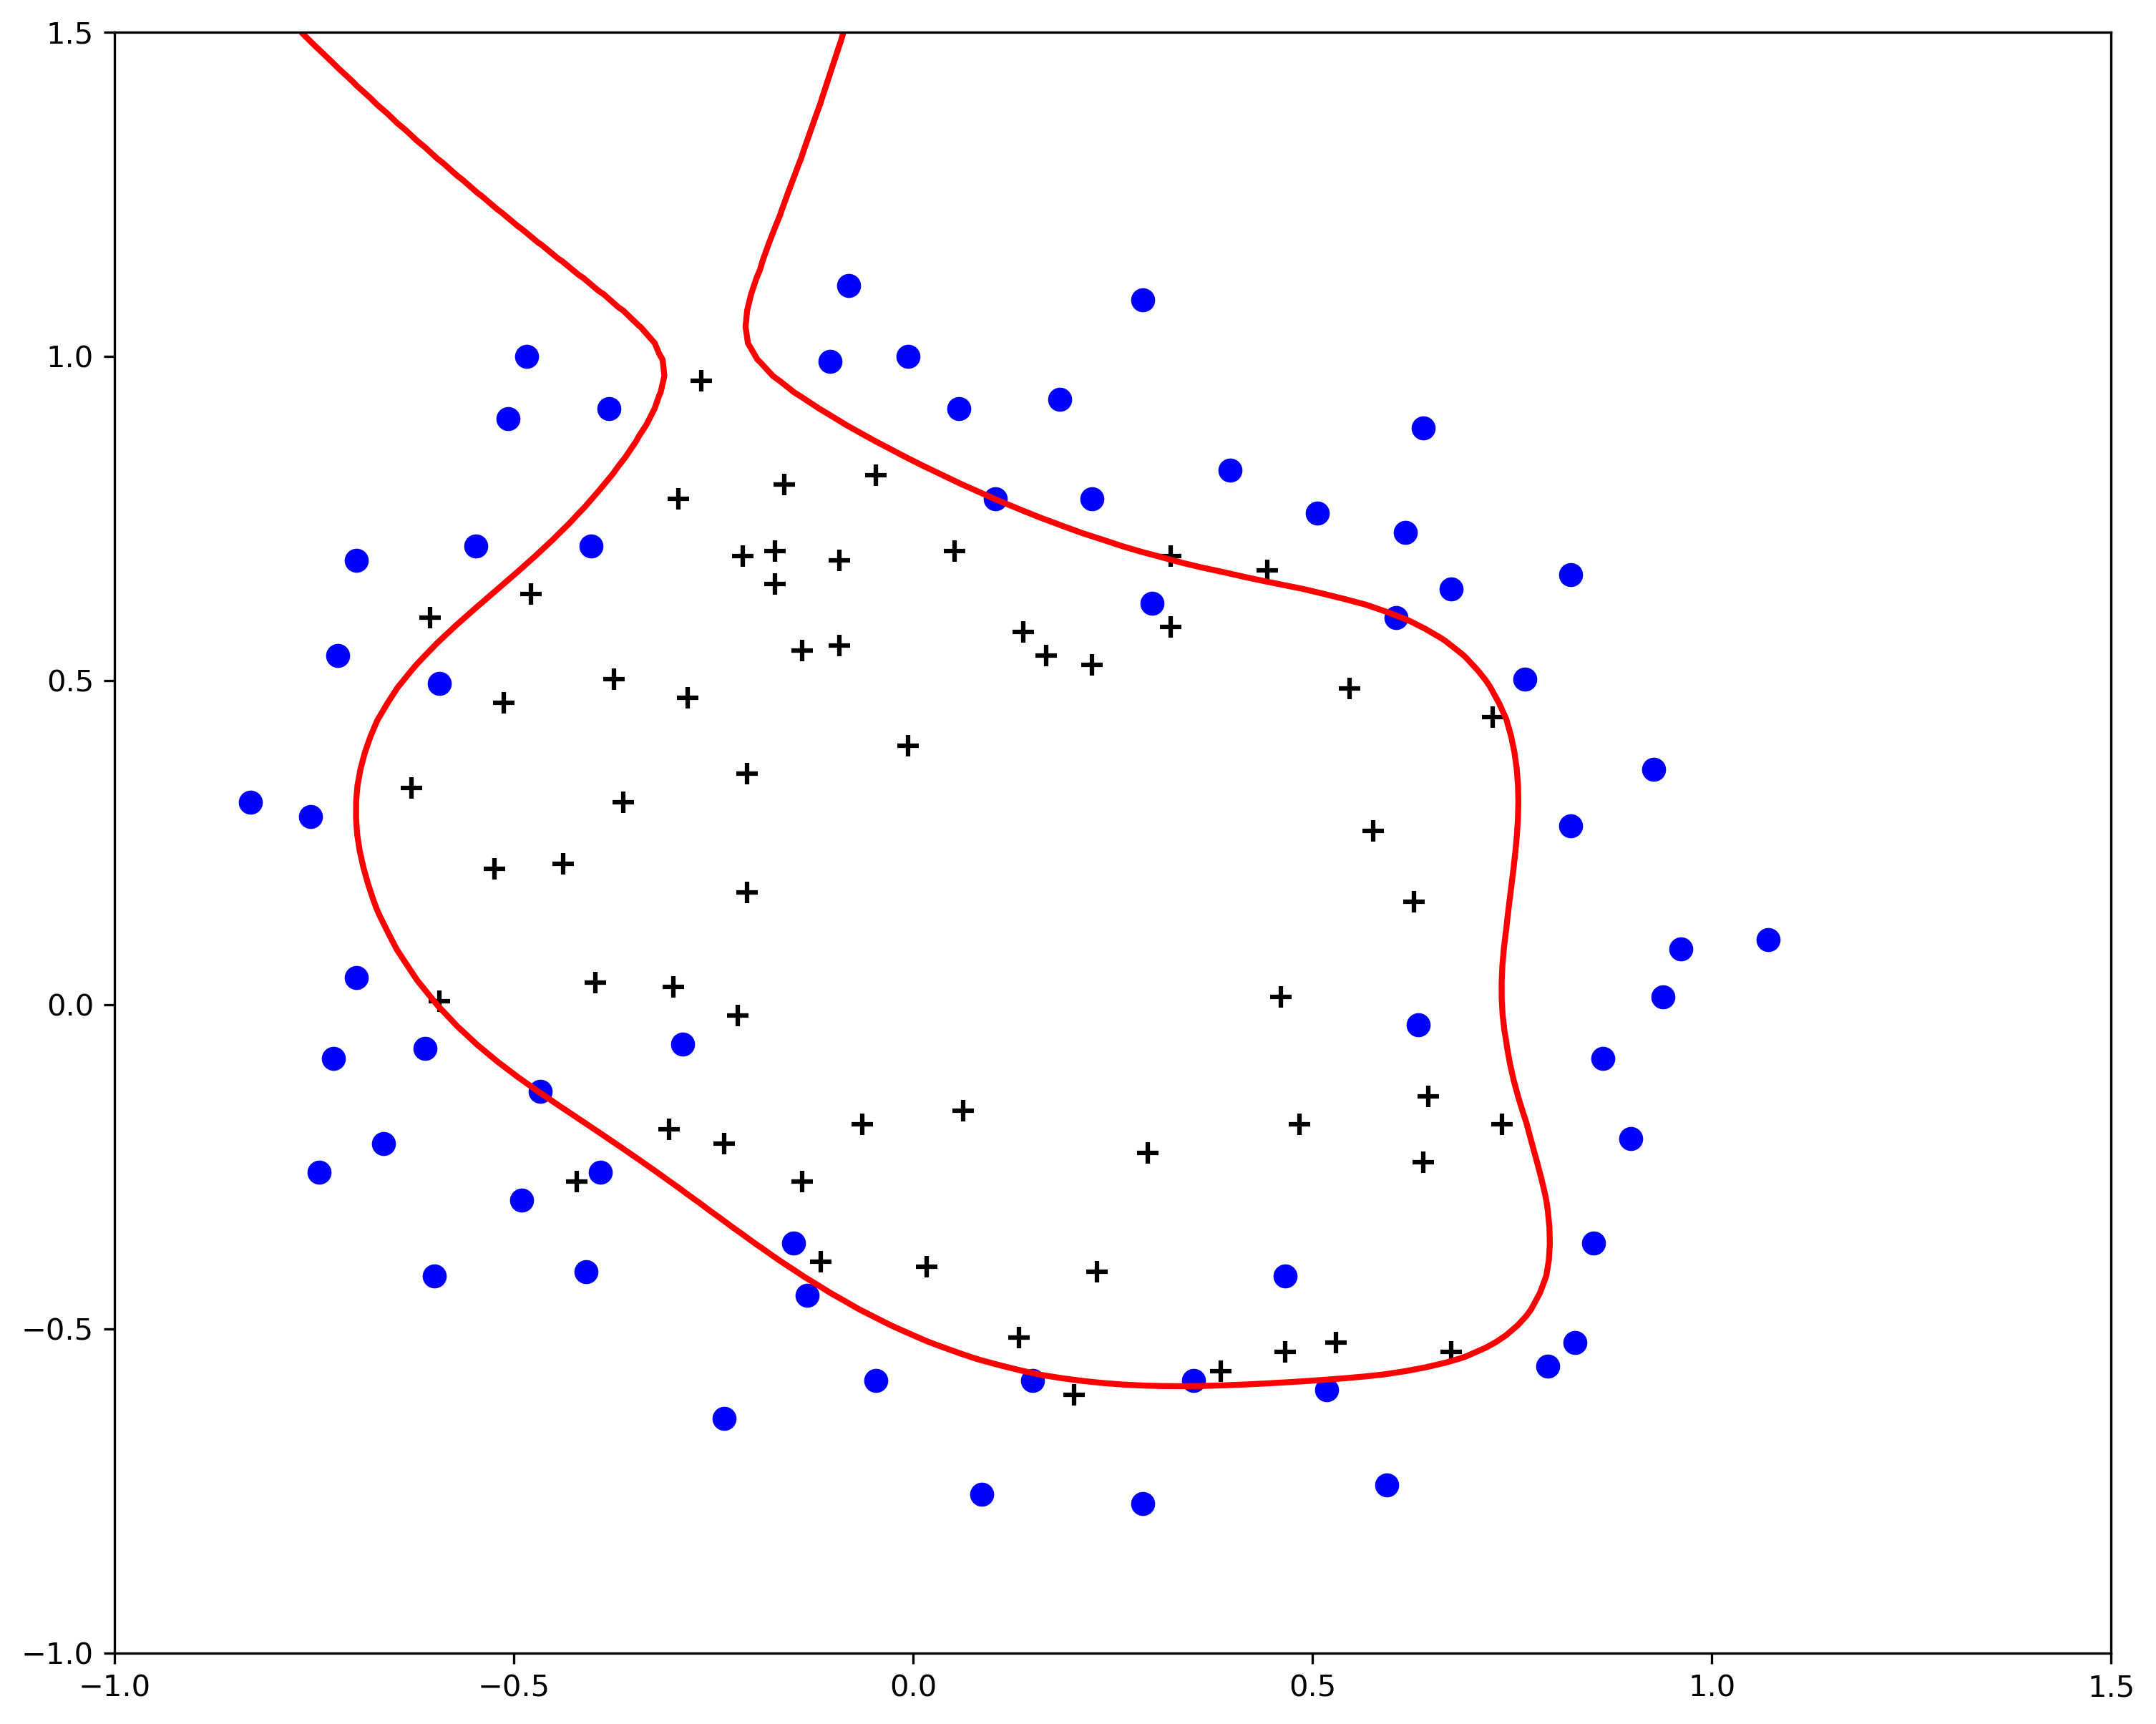

In [553]:
def plot_decision_boundary(theta,density,degree,norm_arg=[],normalization=False):
    x,y = np.meshgrid( np.linspace(-1,1.5,density).reshape(-1,1), \
                    np.linspace(-1,1.5,density).reshape(-1,1) )
    new_X = np.ones((x.shape[0]**2)).astype(np.matrix)
    if normalization:
        x = (x - norm_arg[0]) / norm_arg[1]
        y = (y - norm_arg[2]) / norm_arg[3] 
        new_X = np.c_[new_X,x.ravel(),y.ravel()]
        x,y = np.meshgrid( np.linspace(-1,1.5,density).reshape(-1,1), \
                    np.linspace(-1,1.5,density).reshape(-1,1) ) 
    else :
        new_X = np.c_[new_X,x.ravel(),y.ravel()]    
    new_X = feature_mapping(new_X,start_cols=1,degree=6)

    decision = new_X * theta
    decision = decision.reshape(x.shape)

    plt.clf()
    plt.figure(dpi=300,figsize=(12,10))
    plt.scatter(positive_X["Test1"],positive_X["Test2"],marker="+",c='black',s=50,label="Passed_QA")
    plt.scatter(negative_X["Test1"],negative_X["Test2"],marker="o",c='b',s=50,label="Not Passed QA")
    plt.contour(x,y,decision,levels=[0],linewidths=2,colors=['r'])


density=100
degree=6
plot_decision_boundary(theta,density,degree)

In [311]:
# prediction
x = mat_X[1,:]
# print(x)
predict = sigmoid(x * theta)
print(predict)
print(theta)

[[0.95399812]]
[[  3.98319781]
 [  1.36850003]
 [  5.43718249]
 [ -4.18483606]
 [ -4.81980061]
 [-12.77108849]
 [  7.73431623]
 [  1.00059713]
 [ -9.00207478]
 [  7.01416097]
 [ -1.22162831]
 [-10.09882437]
 [ -7.79890678]
 [ -6.23460064]
 [  3.07355121]
 [ -6.66547573]
 [ -6.68395832]
 [-10.46038185]
 [  3.8841028 ]
 [  4.6499442 ]
 [ 11.74675575]
 [  7.95790457]
 [ -2.01599155]
 [ -2.71991866]
 [ -0.8359666 ]
 [ -3.12881585]
 [ -2.20413302]
 [ -9.47196431]]


### multi-variable logistic regression with feature scaling

In [555]:
df_data = pd.read_csv("ex2data2.txt",header=None,names=["Test1","Test2","Passed_QA"])
df_X = df_data.drop(labels="Passed_QA",axis=1)
df_y = df_data["Passed_QA"]
df_norm_X = ( df_X-df_X.mean() ) / df_X.std()

df_norm_X.insert(0,"Ones",1)


mat_norm_X = np.mat(df_norm_X)
mat_norm_X = feature_mapping(mat_norm_X,start_cols=1,degree=6)
mat_y = np.mat(df_y).T        
mat_norm_X.shape


(118, 28)

0.2789910658508999


<Figure size 432x288 with 0 Axes>

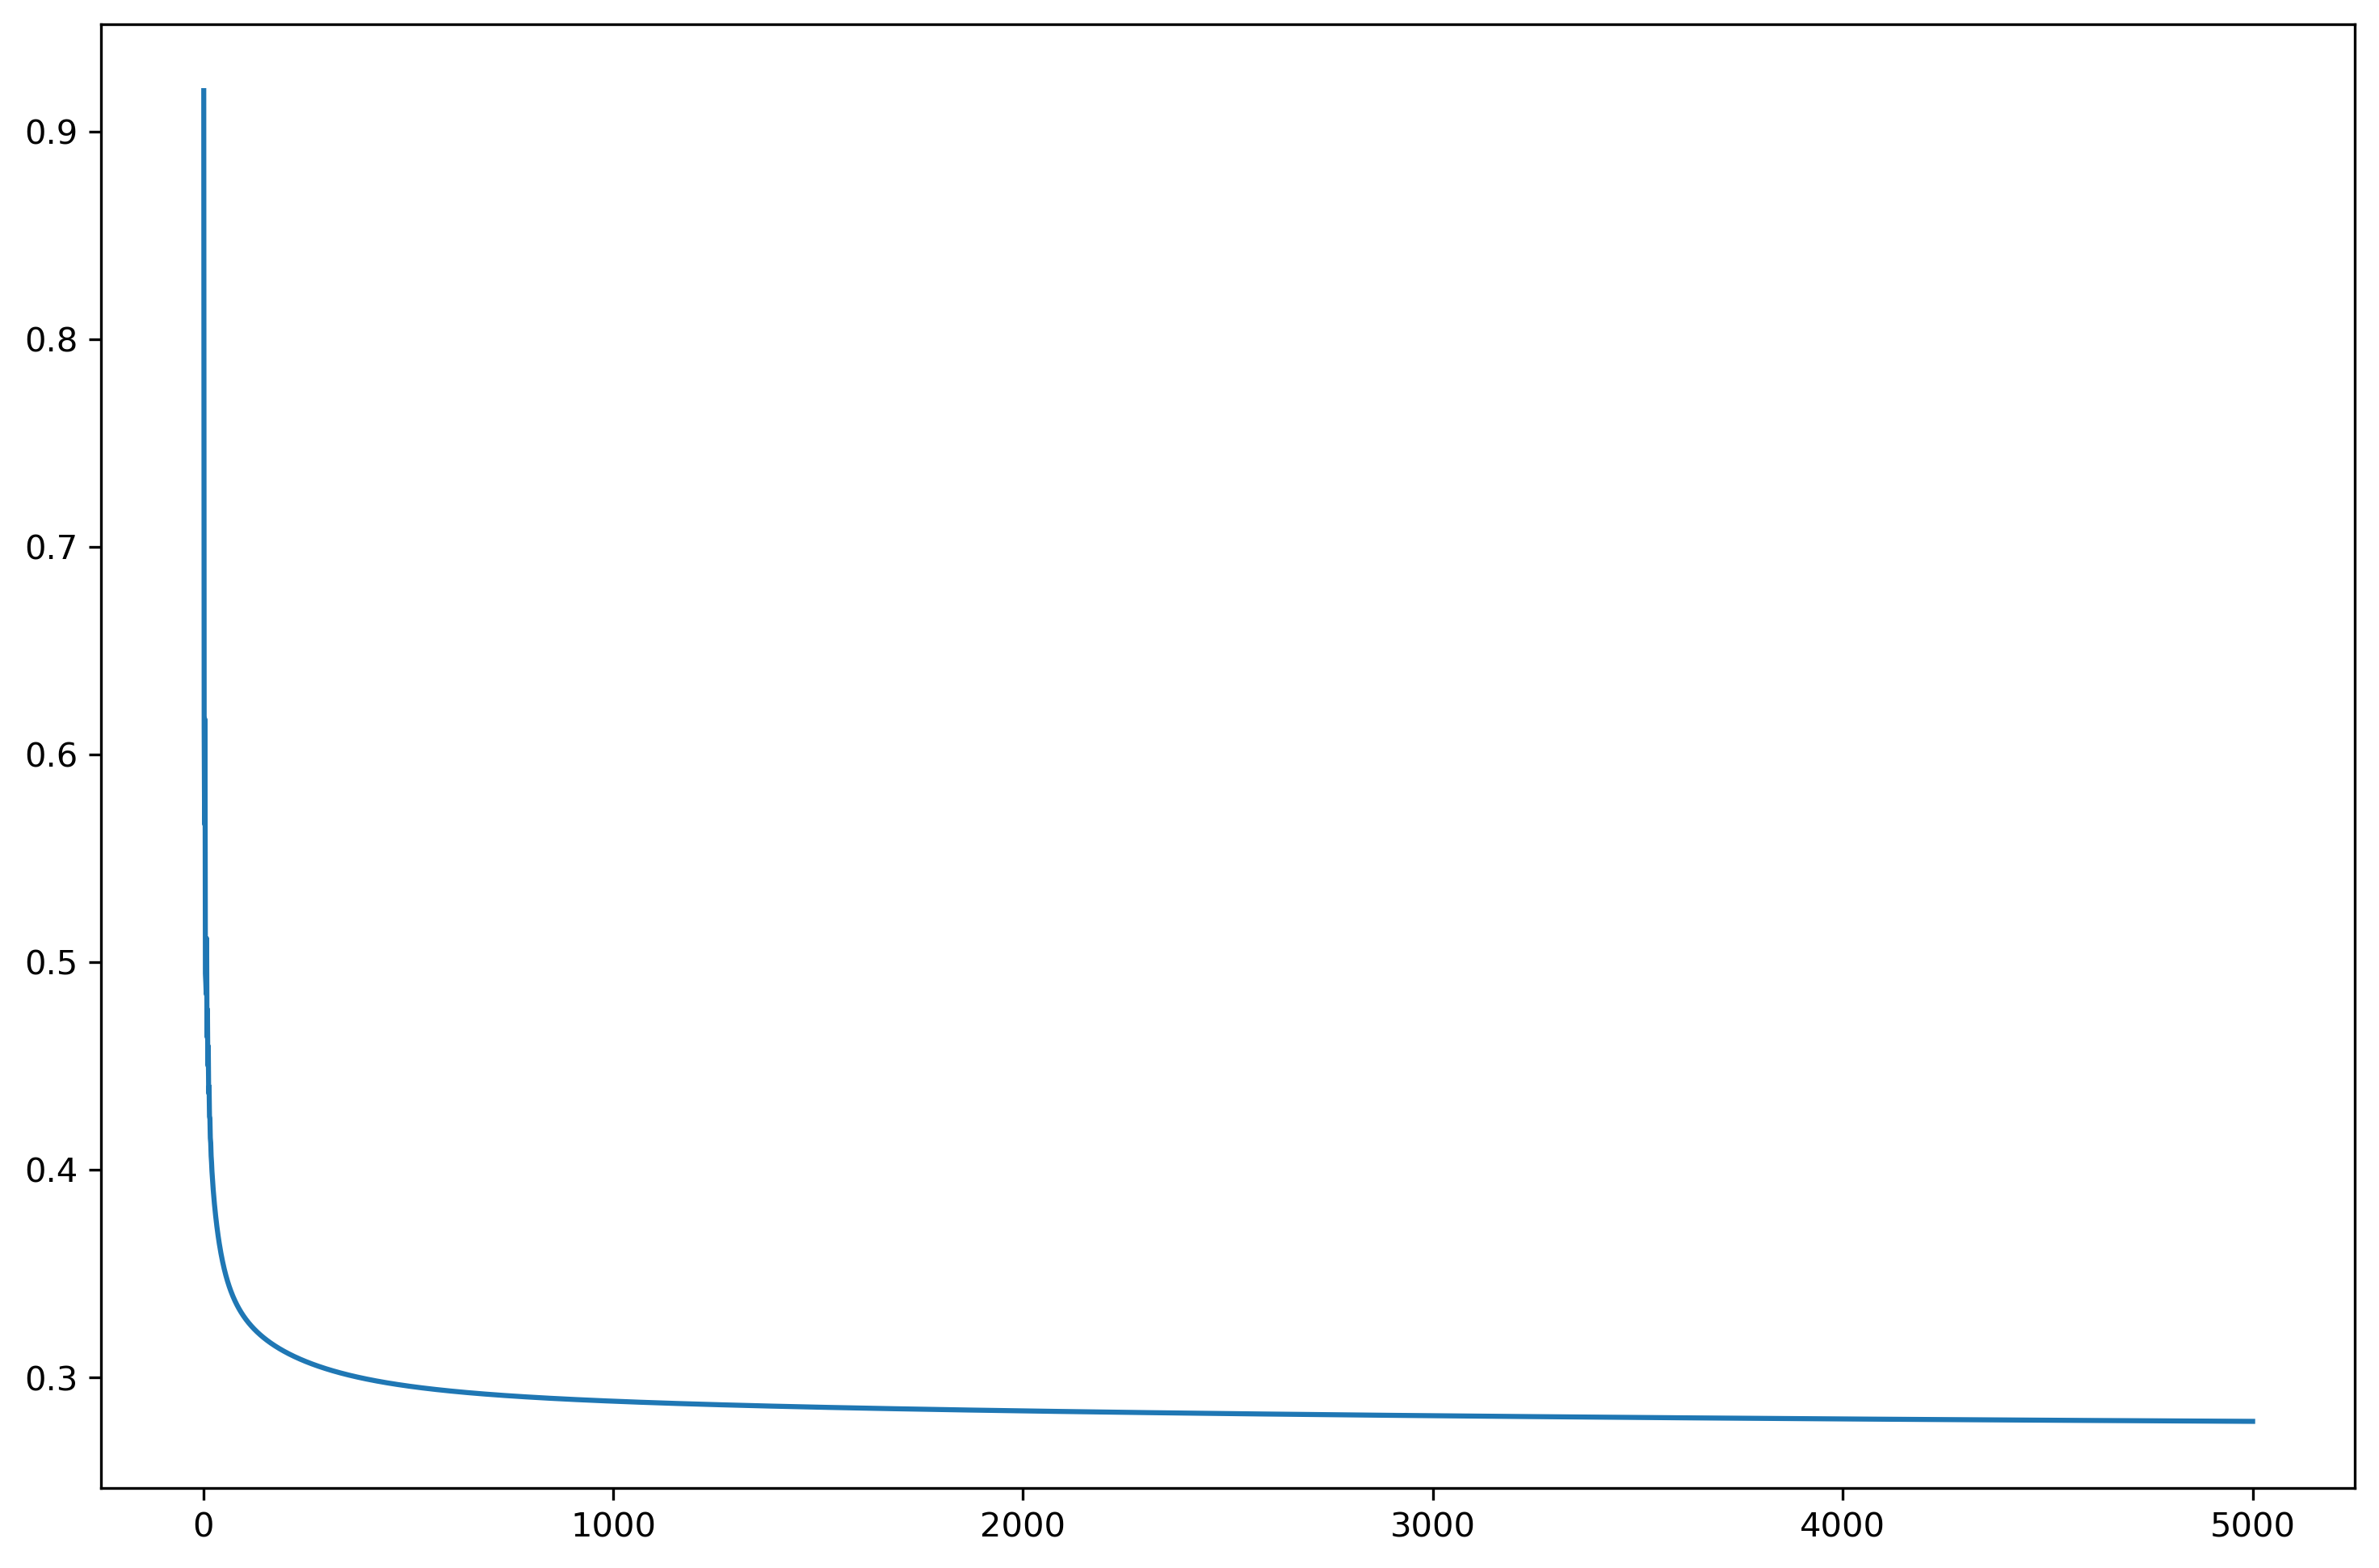

In [556]:
iter_num = 5000
alpha = 0.3
theta,cost = logistic_regression_gradient_descent(mat_norm_X,mat_y,iter_num,alpha)
print(cost[-1])


plt.clf()
plt.figure(dpi=300,figsize=(12,8))
plt.plot(range(1,iter_num+1),cost)

<Figure size 432x288 with 0 Axes>

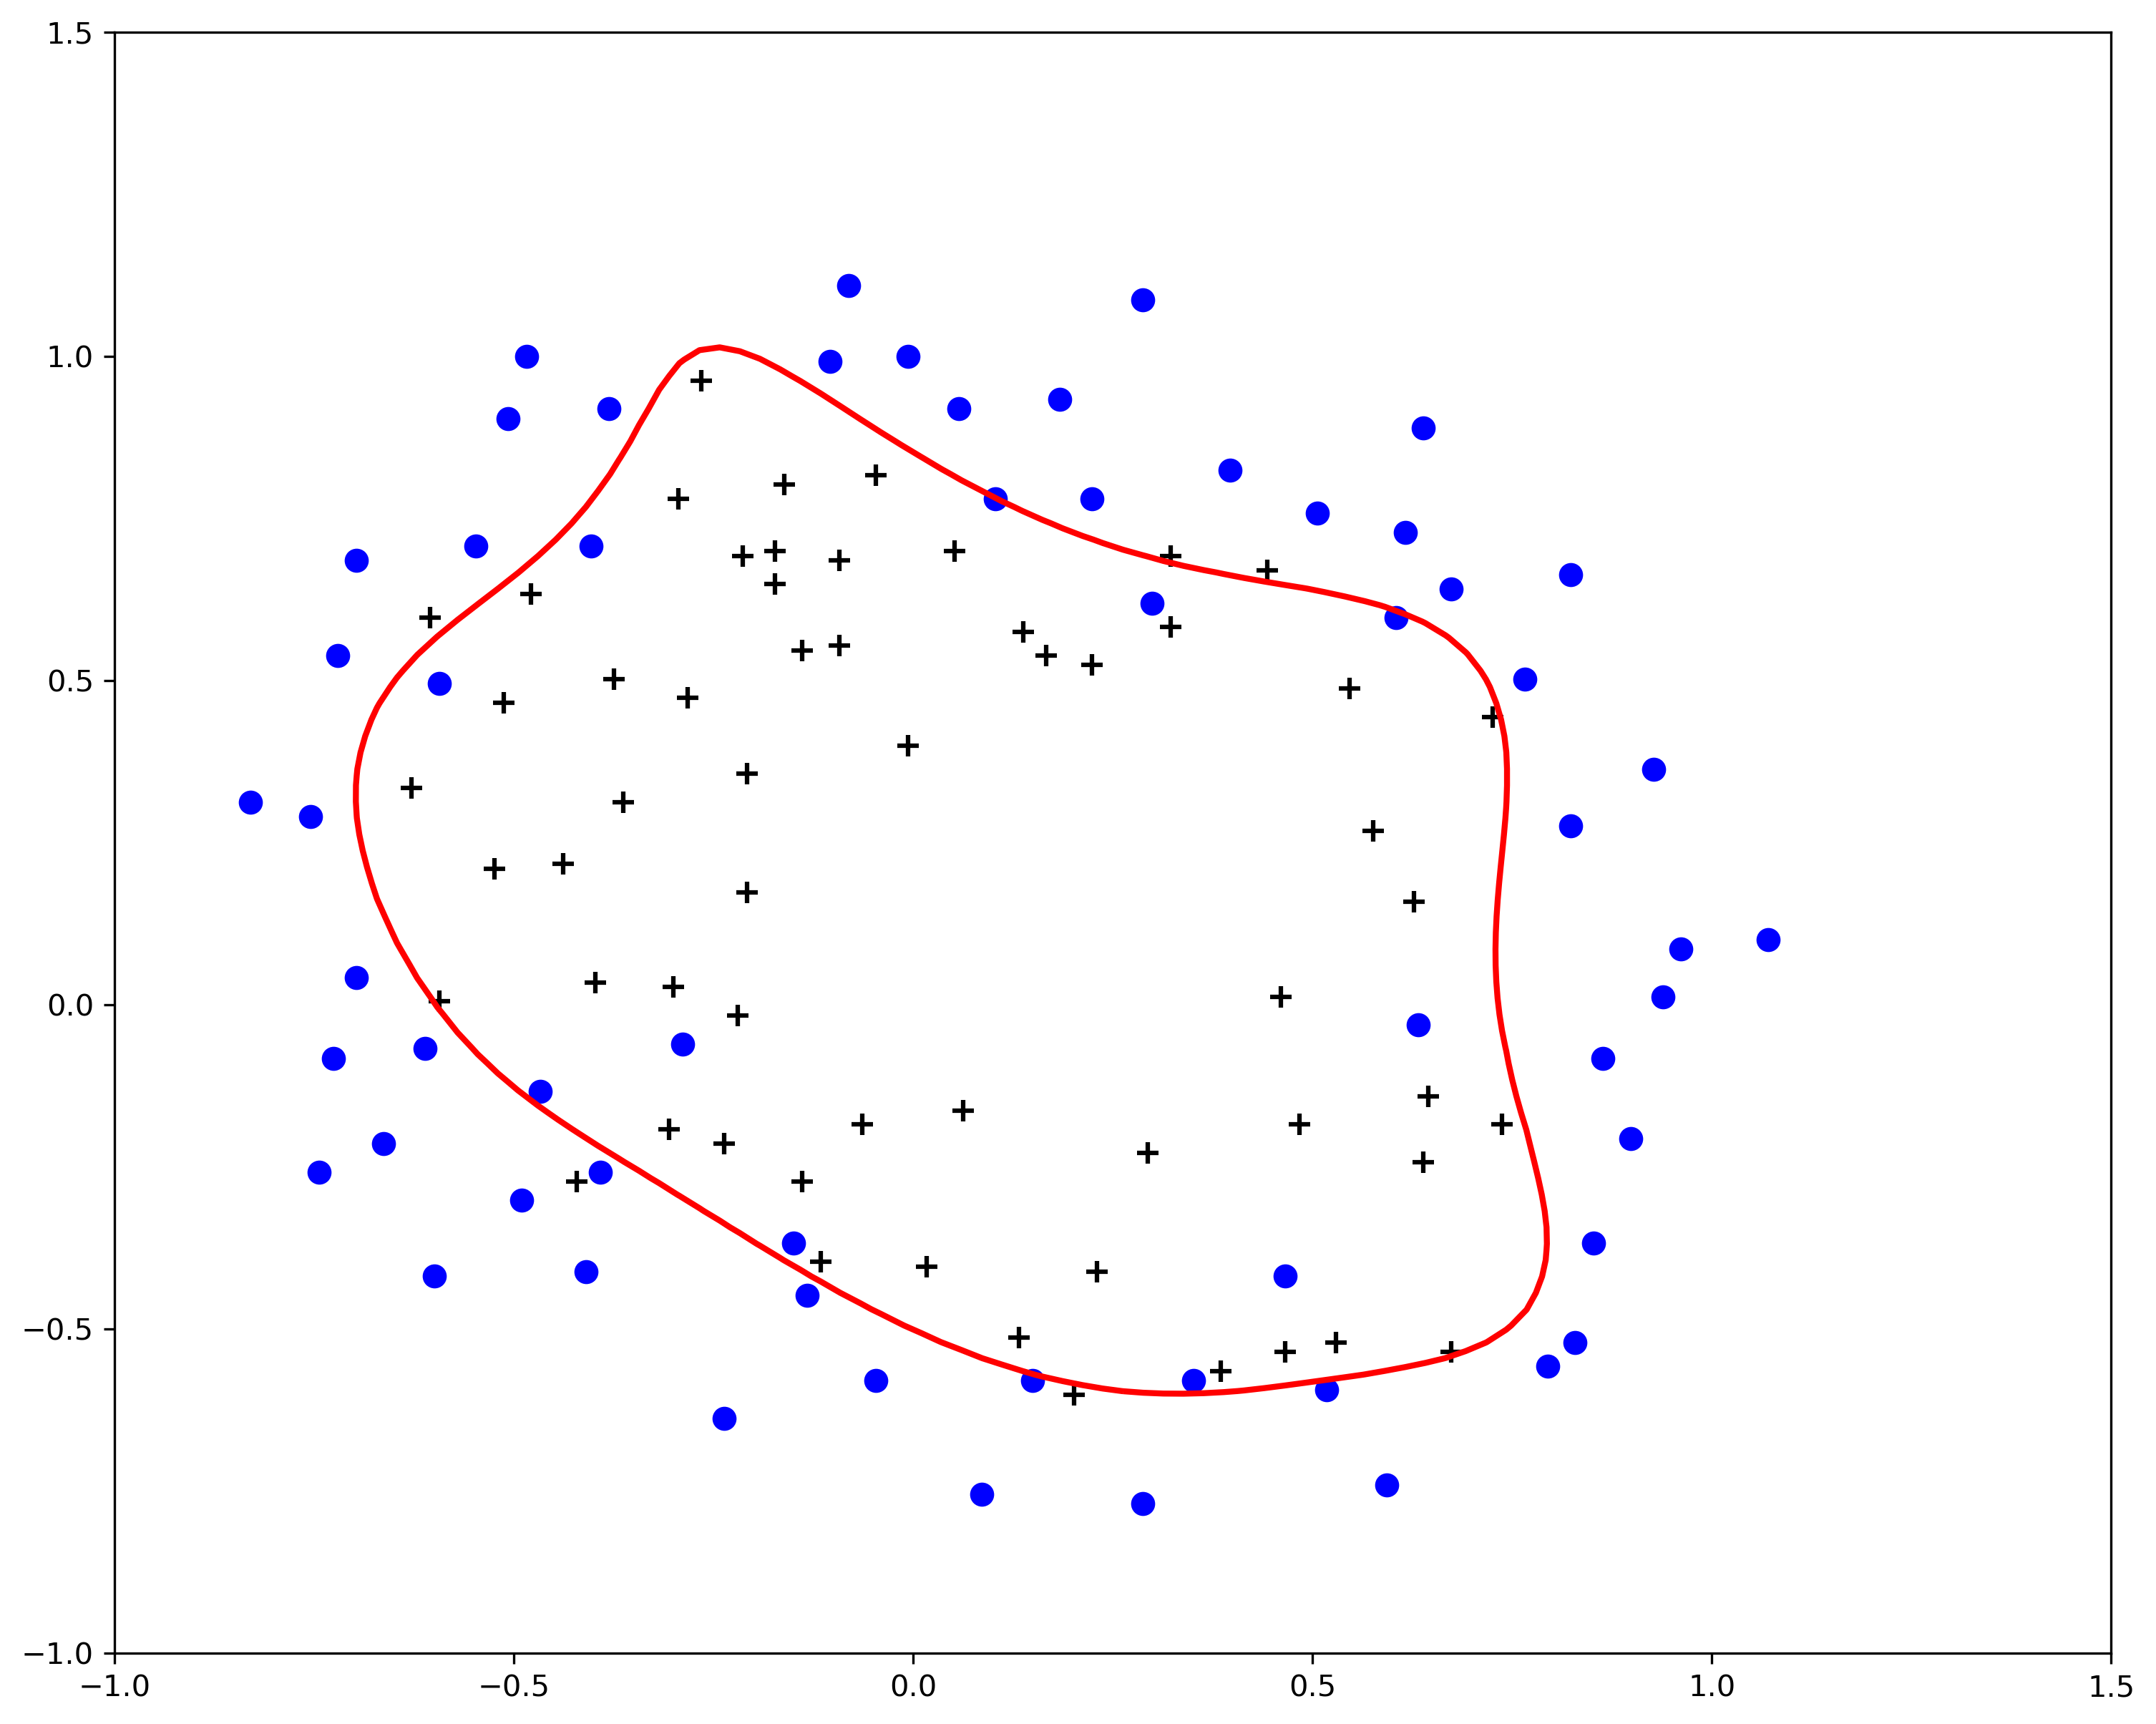

In [557]:
density=100
degree=6
norm_arg=[df_data["Test1"].mean(),df_data["Test1"].std()
         ,df_data["Test2"].mean(),df_data["Test2"].std()]
plot_decision_boundary(theta,density,degree,norm_arg,True)

### implementation with SciPy

0.2702802021340963


<Figure size 432x288 with 0 Axes>

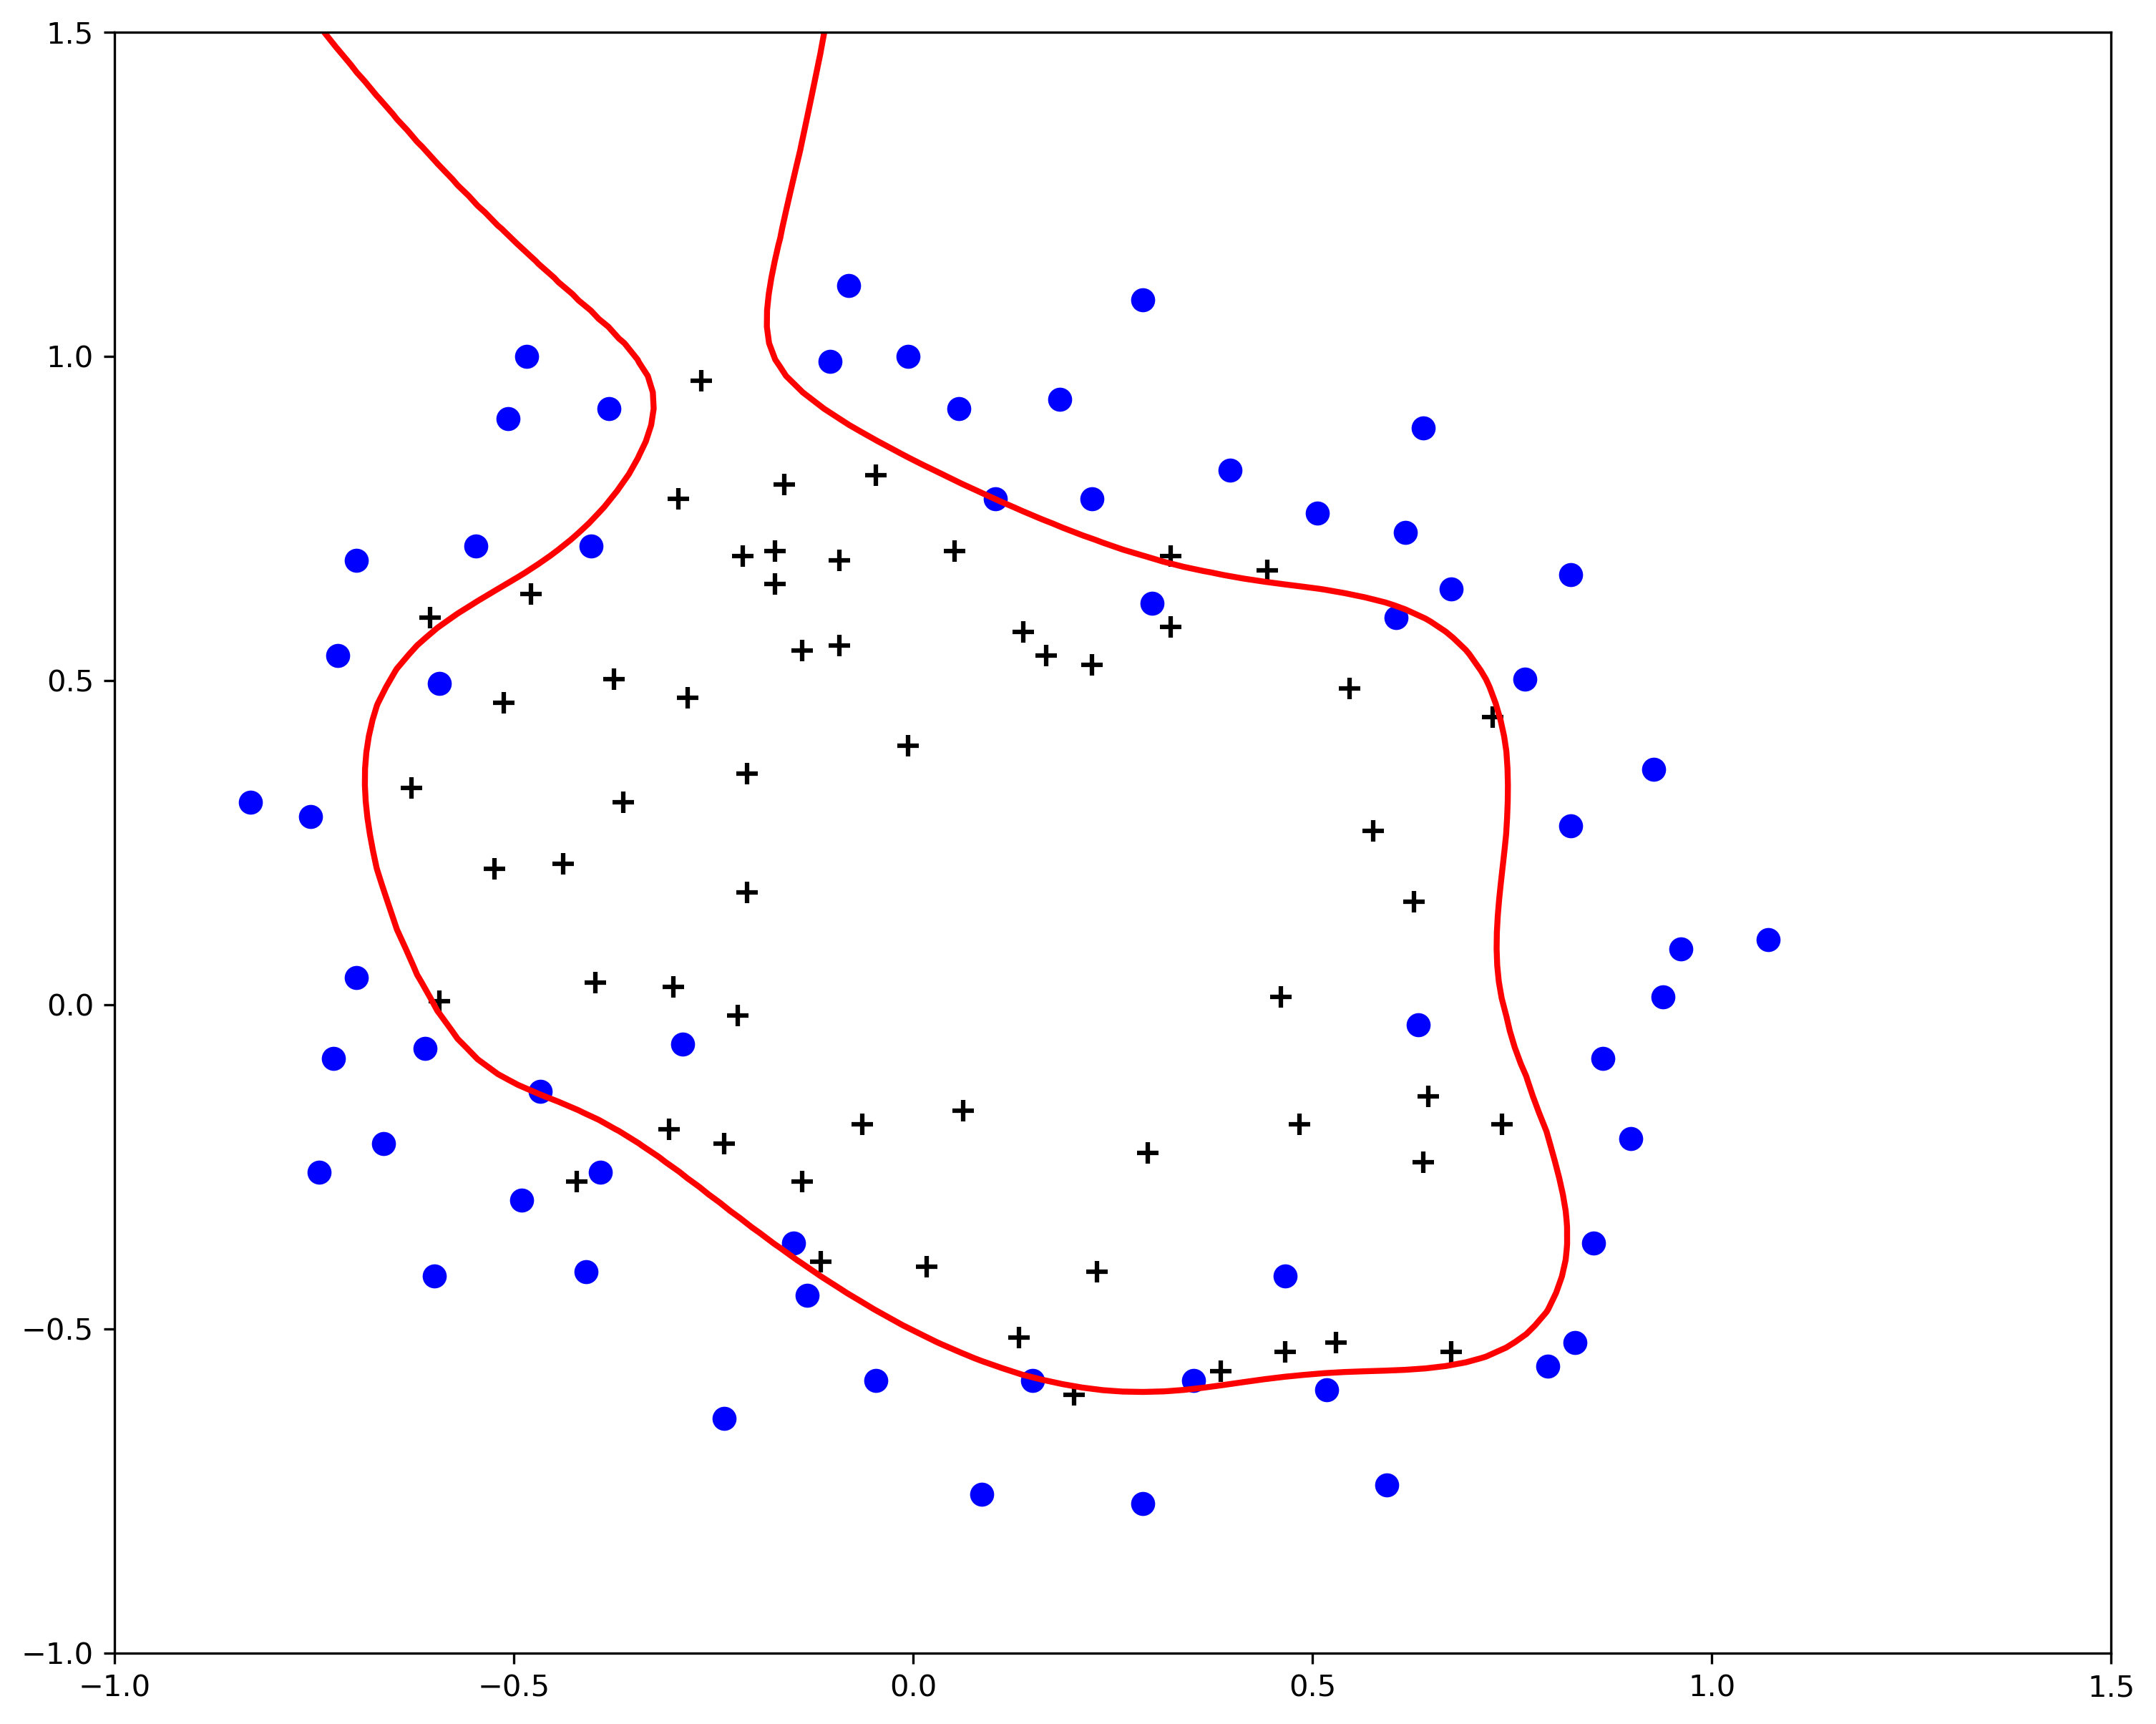

In [558]:
import scipy.optimize as opt

degree=6

df_data = pd.read_csv("ex2data2.txt",header=None,names=["Test1","Test2","Passed_QA"])
df_X = df_data.drop("Passed_QA",axis=1)
df_y = df_data["Passed_QA"]
arr_X = np.ones(len(df_X))
mat_X = np.mat(np.c_[arr_X,np.array(df_X)])
mat_X = feature_mapping(mat_X,start_cols=1,degree=6)
mat_y = np.mat(df_y).T
theta = np.zeros((mat_X.shape[1]))

# 注意：opt.fmin_tnc或者opt.minimize
# 会把变量x0当作np.array处理，所以在写函数时要做相应处理
# res = opt.minimize(fun=cost_comput, x0=theta, args=(mat_X,mat_y), method='Powell', jac=gradient)
res = opt.minimize(fun=cost_comput, x0=theta, args=(mat_X,mat_y), method='L-BFGS-B', jac=gradient,options={'maxiter': 400, 'disp': True})
theta = np.mat(res["x"])

print(cost_comput(theta,mat_X,mat_y))
plot_decision_boundary(theta.T,density,degree)


## Regularized logistic regression

In [576]:
def reg_cost_comput(theta,X,y,reg_lambda):
    theta = np.mat(theta).T
    first = np.multiply(np.log(sigmoid(X*theta)),y)
    second = np.multiply(np.log(1-sigmoid(X*theta)),y-1)
    reg = (theta[1:,0].T * theta[1:,0]) * (reg_lambda / (2*X.shape[0]))
    return float(sum(second-first) / X.shape[0] + reg)

def reg_gradient(theta,X,y,reg_lambda):
    theta = np.mat(theta).T
    error = sigmoid(X*theta)-y
    grad = ( X.T * error ).T / len(X)
    
    reg = theta[1:,0] * (reg_lambda / len(X))
    grad[0,1:] = grad[0,1:]+reg.T
    return grad

<Figure size 432x288 with 0 Axes>

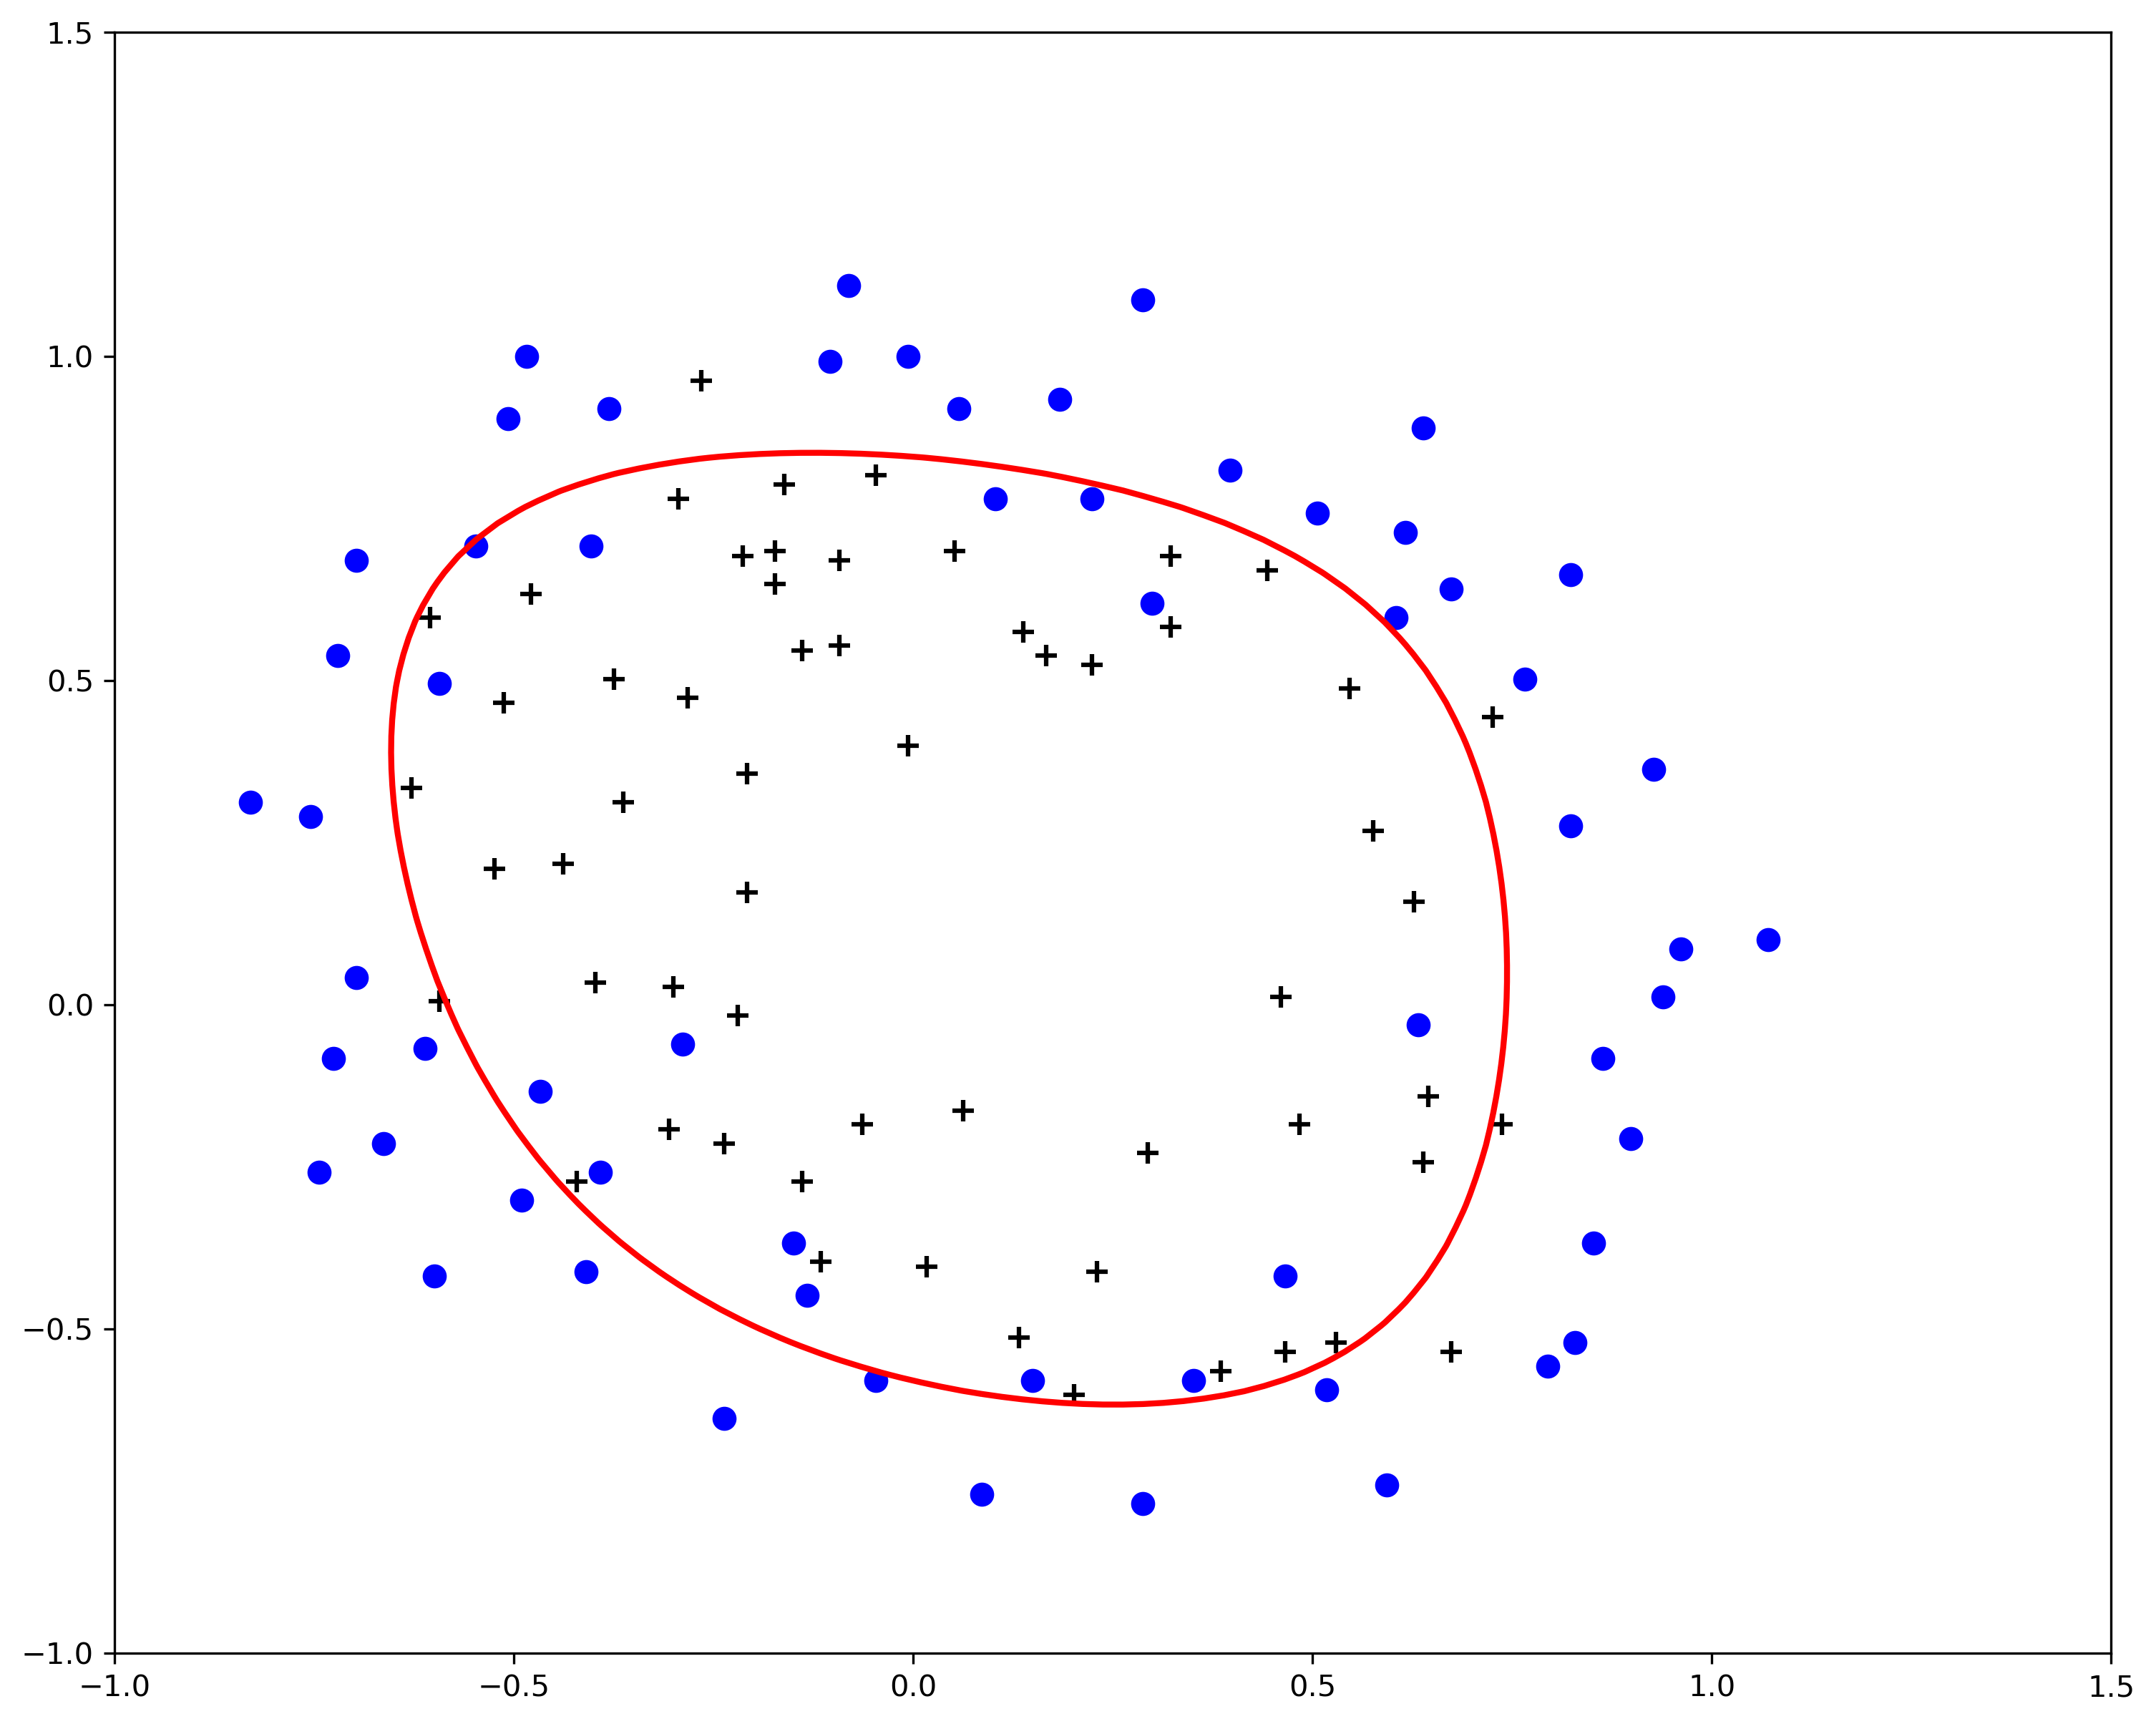

In [577]:
degree=6
reg_lambda=1

df_data = pd.read_csv("ex2data2.txt",header=None,names=["Test1","Test2","Passed_QA"])
df_X = df_data.drop("Passed_QA",axis=1)
df_y = df_data["Passed_QA"]
arr_X = np.ones(len(df_X))
mat_X = np.mat(np.c_[arr_X,np.array(df_X)])
mat_X = feature_mapping(mat_X,degree,start_cols=1)
mat_y = np.mat(df_y).T
theta = np.zeros((mat_X.shape[1]))


# reg_cost_comput(theta,mat_X,mat_y,reg_lambda)
# reg_gradient(theta,mat_X,mat_y,reg_lambda)

res = opt.minimize(fun=reg_cost_comput, x0=theta, args=(mat_X,mat_y,reg_lambda), method='L-BFGS-B', jac=reg_gradient,options={'maxiter': 400})
# print(res)

theta = np.mat(res["x"])
plot_decision_boundary(theta.T,density,degree)

<Figure size 432x288 with 0 Axes>

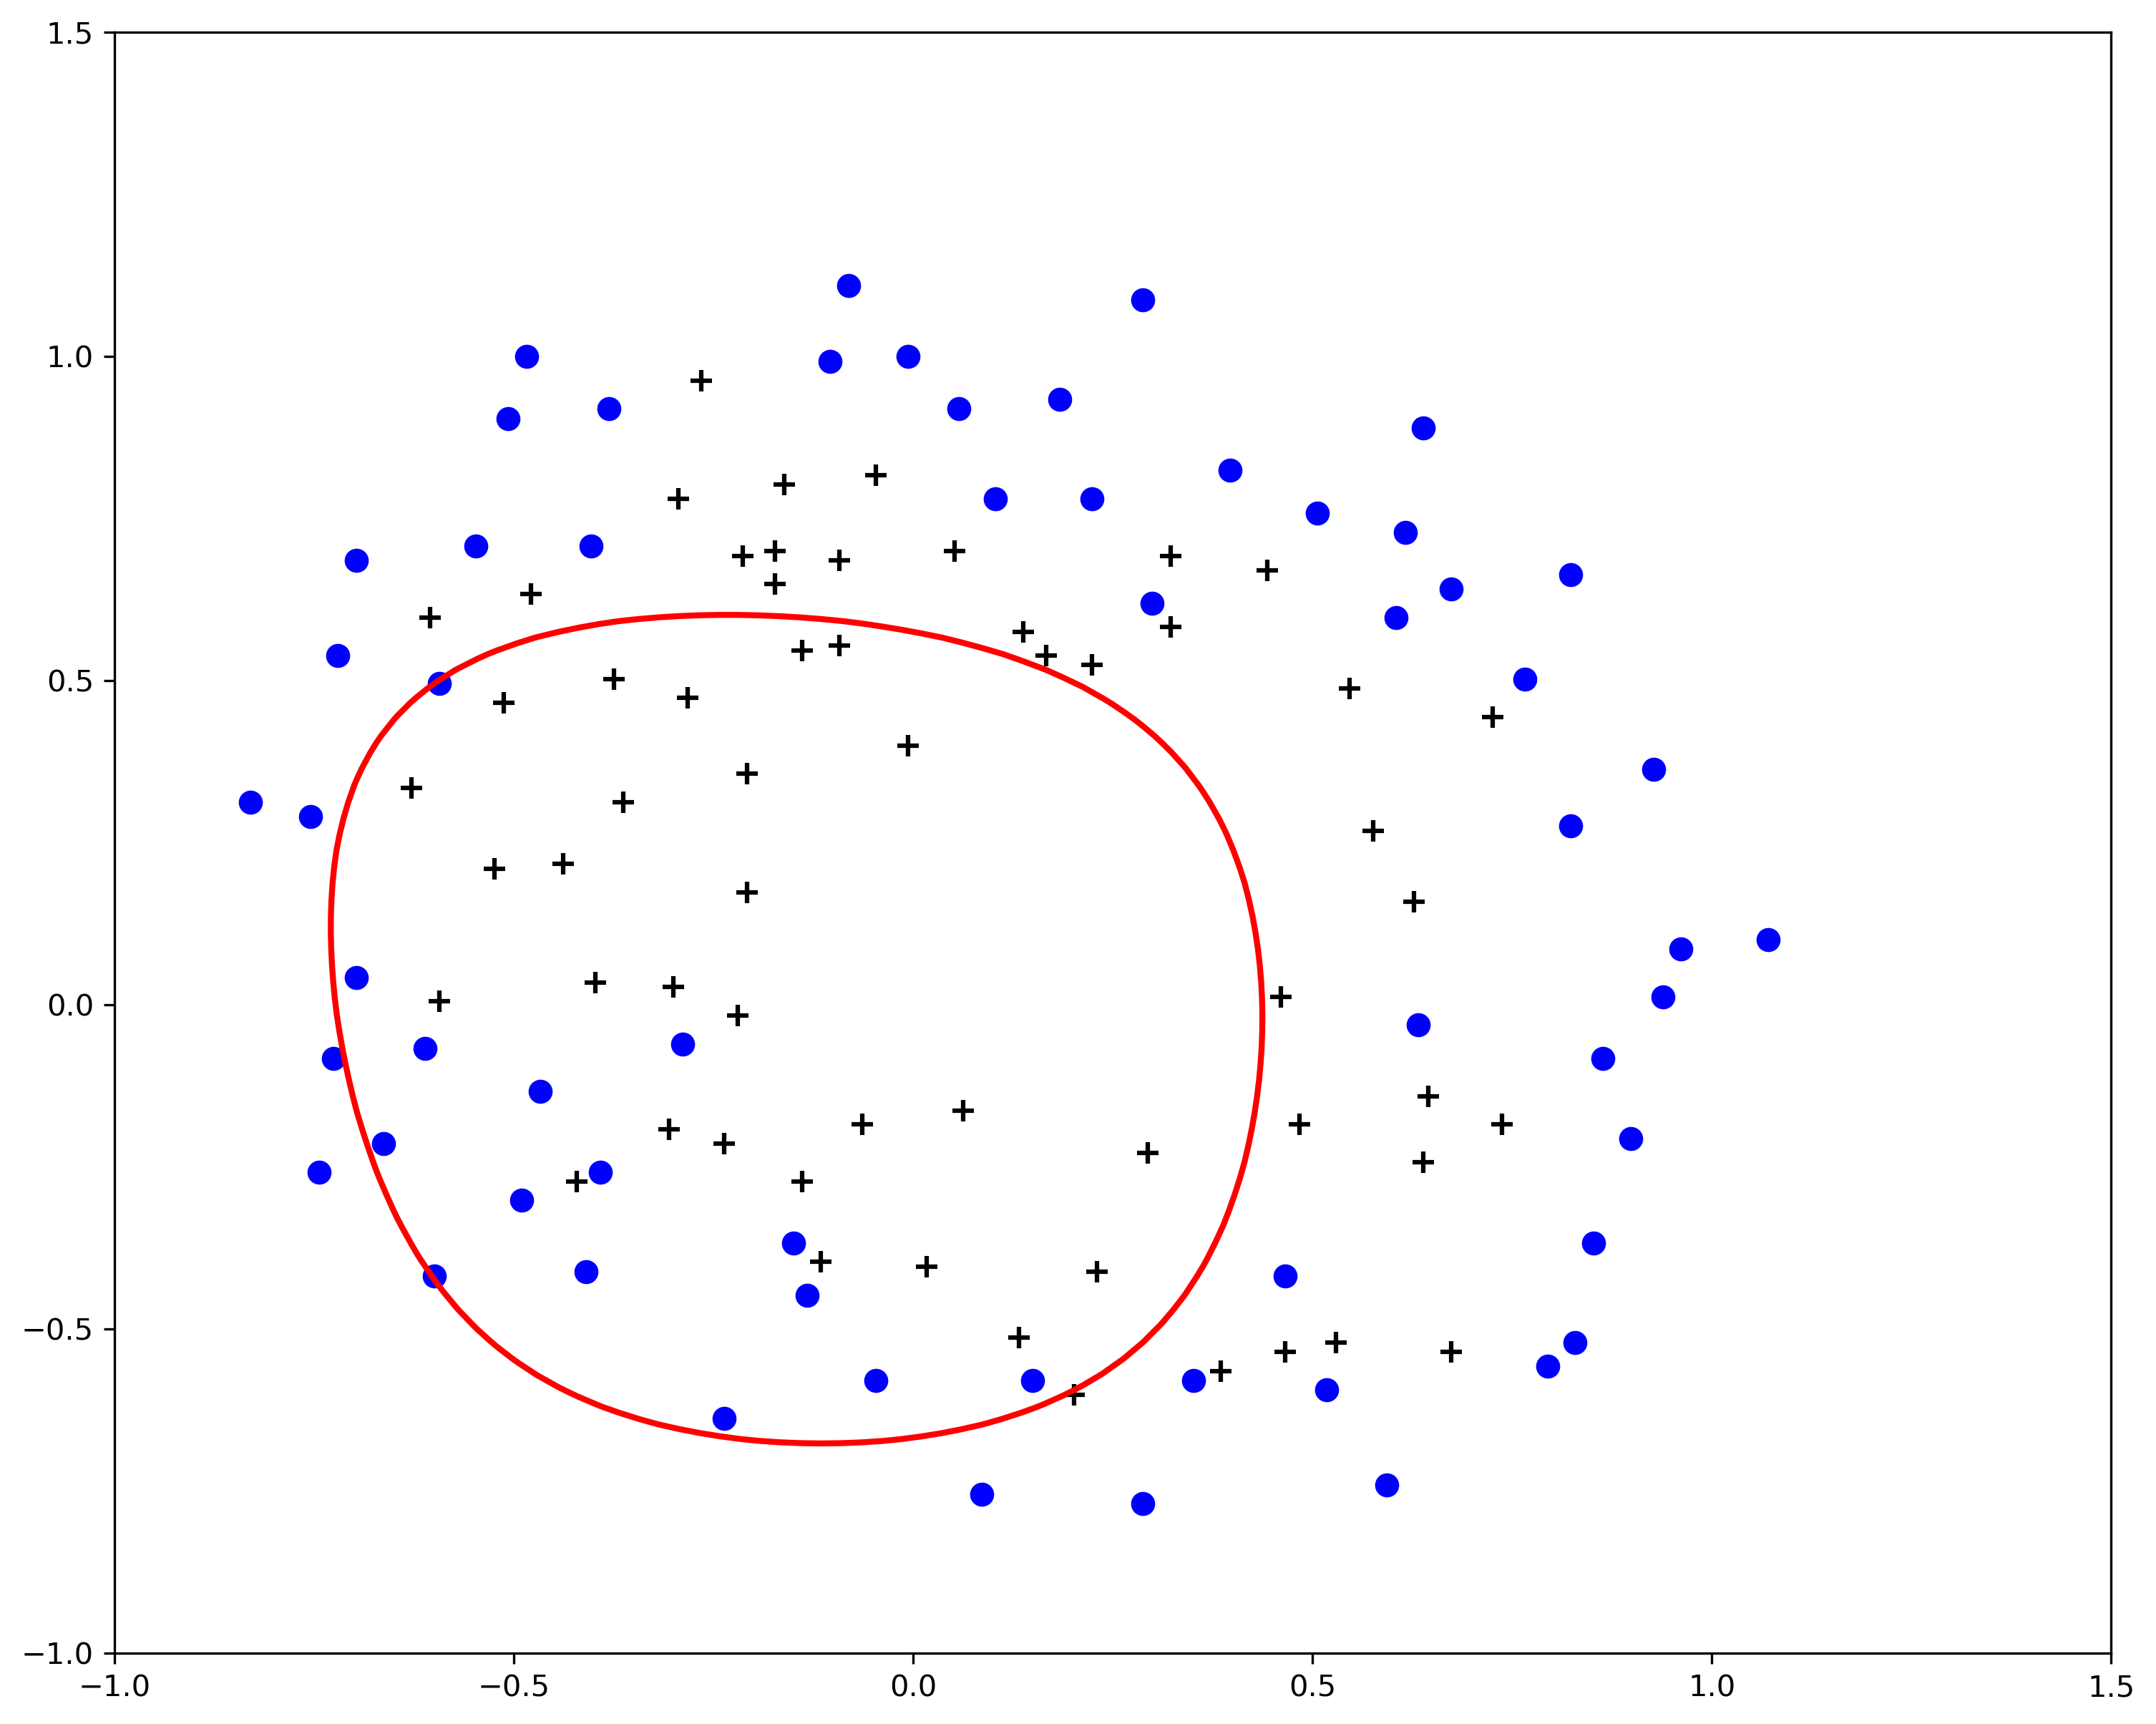

In [578]:
degree=6
reg_lambda=100

df_data = pd.read_csv("ex2data2.txt",header=None,names=["Test1","Test2","Passed_QA"])
df_X = df_data.drop("Passed_QA",axis=1)
df_y = df_data["Passed_QA"]
arr_X = np.ones(len(df_X))
mat_X = np.mat(np.c_[arr_X,np.array(df_X)])
mat_X = feature_mapping(mat_X,degree,start_cols=1)
mat_y = np.mat(df_y).T
theta = np.zeros((mat_X.shape[1]))


# reg_cost_comput(theta,mat_X,mat_y,reg_lambda)
# reg_gradient(theta,mat_X,mat_y,reg_lambda)

res = opt.minimize(fun=reg_cost_comput, x0=theta, args=(mat_X,mat_y,reg_lambda), method='L-BFGS-B', jac=reg_gradient,options={'maxiter': 400})
# print(res)

theta = np.mat(res["x"])
plot_decision_boundary(theta.T,density,degree)

<Figure size 432x288 with 0 Axes>

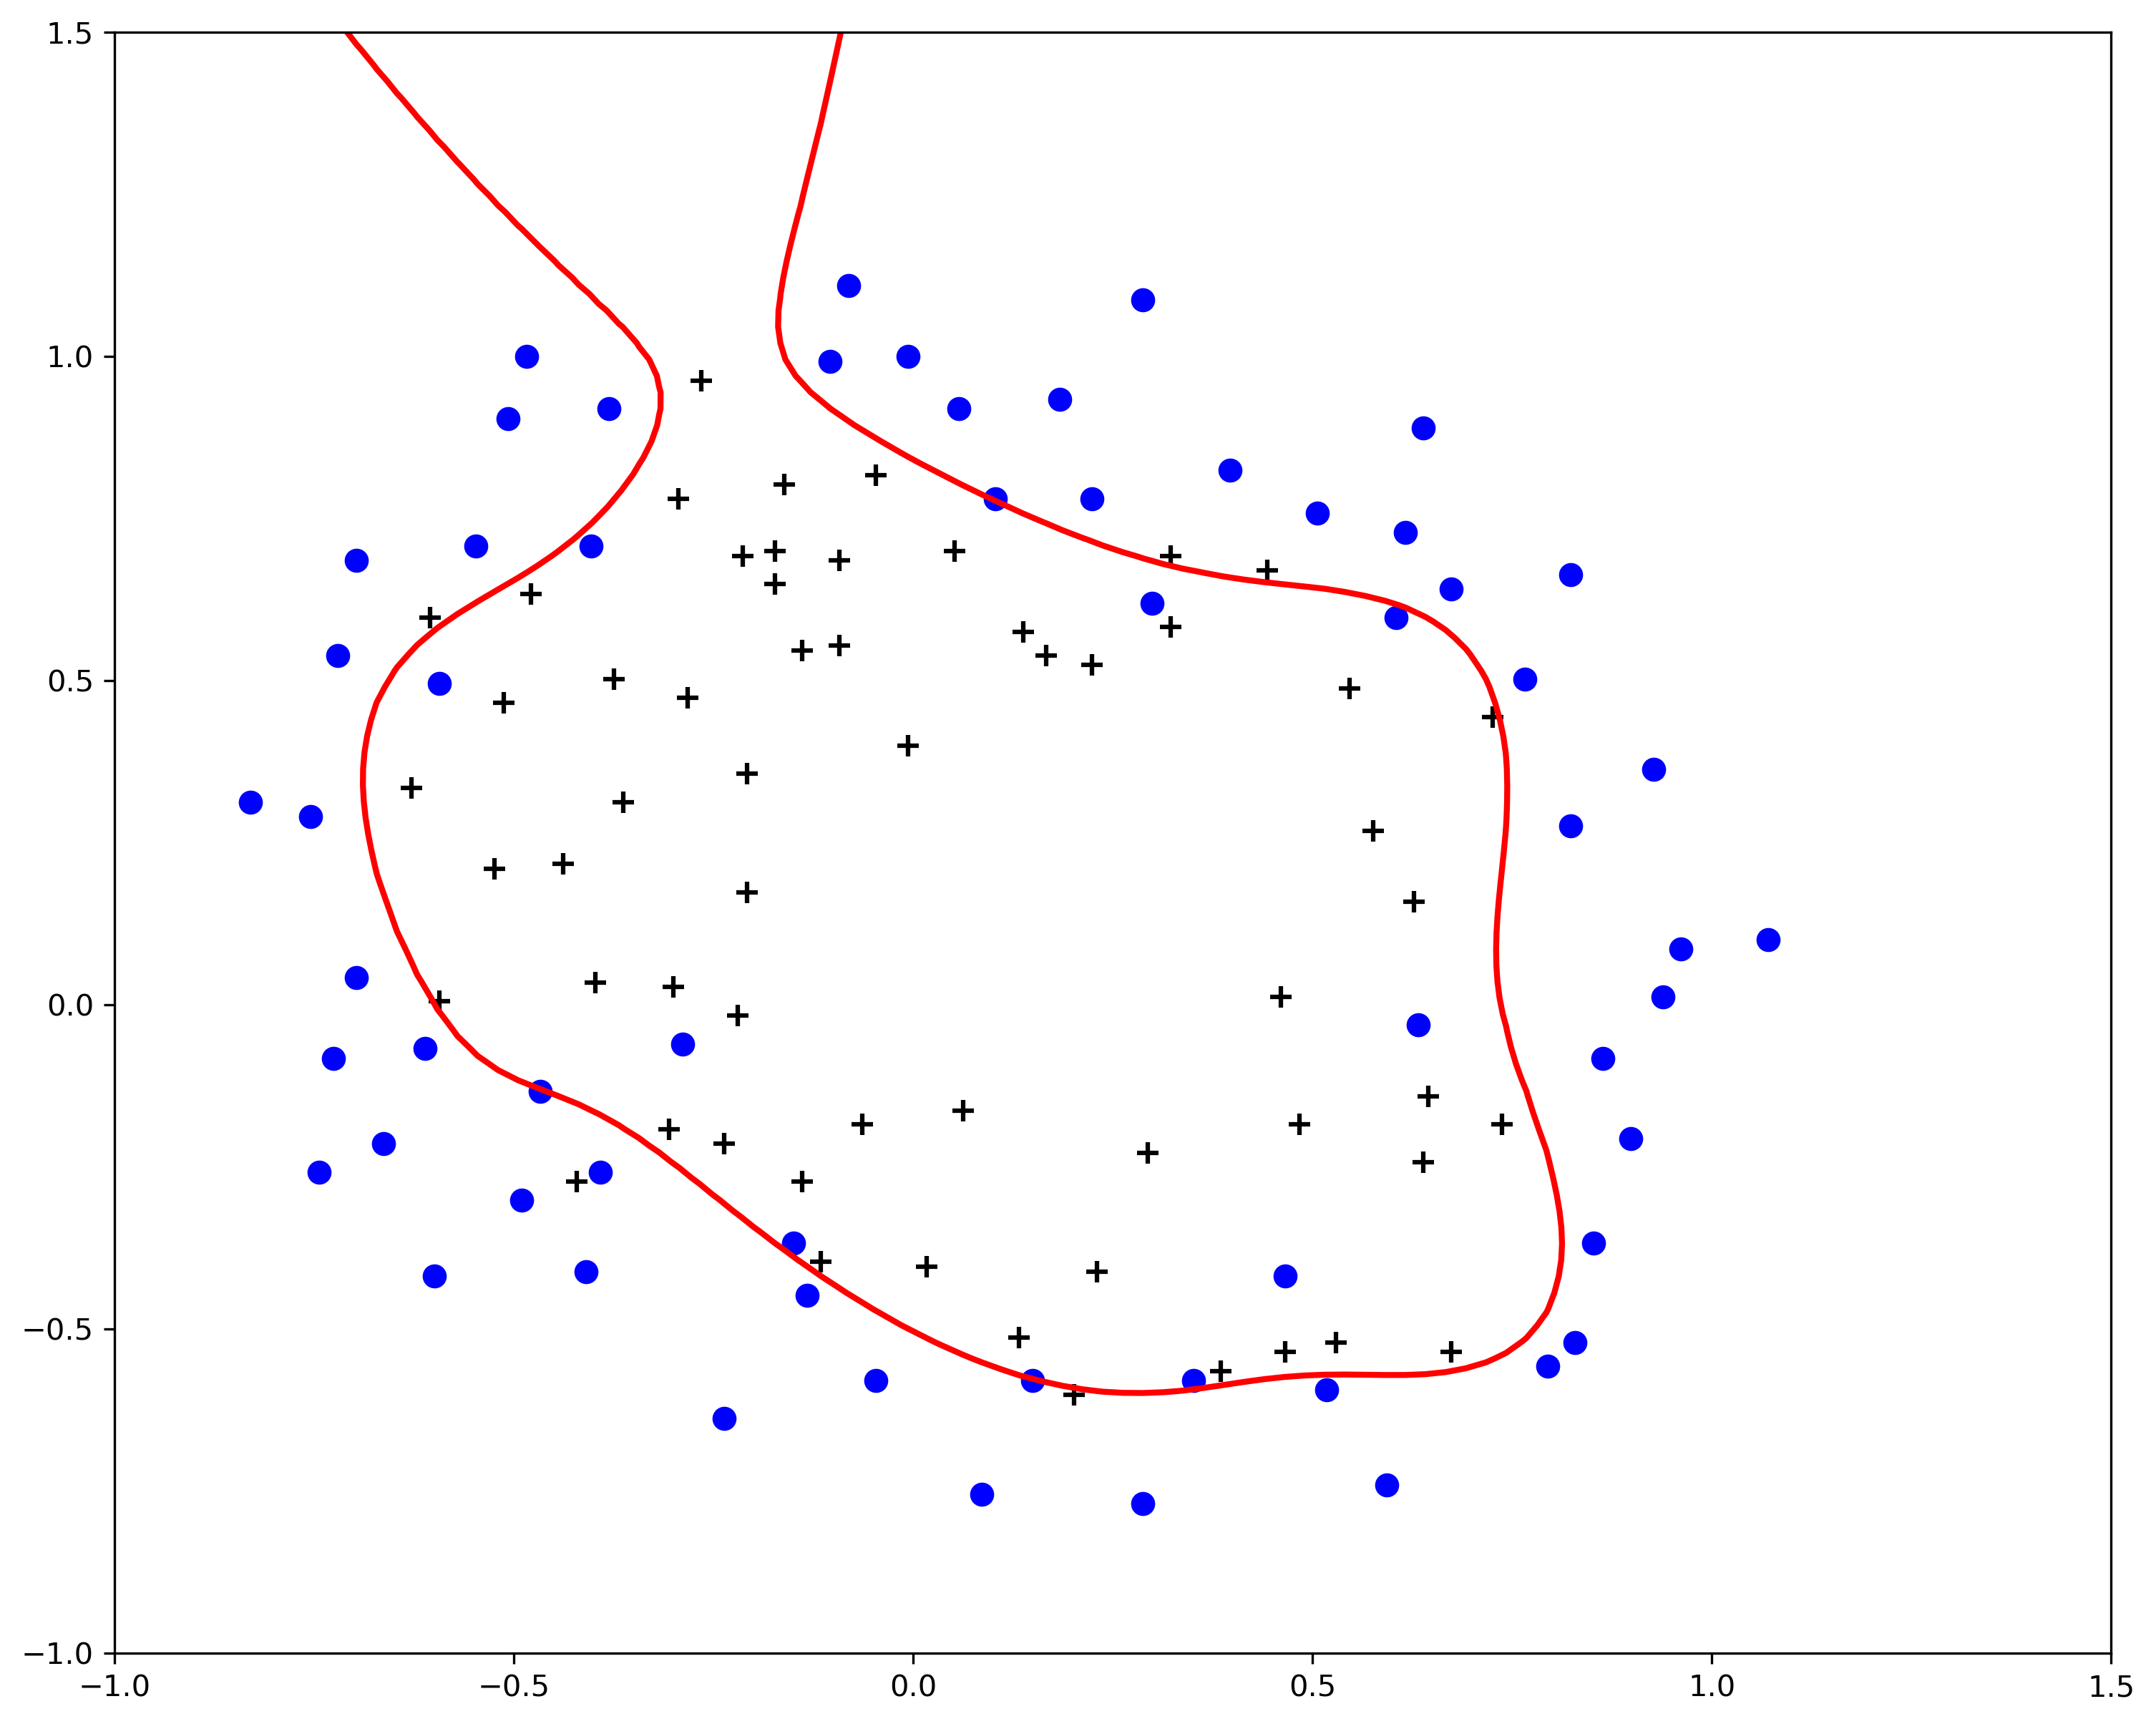

In [579]:
degree=6
reg_lambda=0

df_data = pd.read_csv("ex2data2.txt",header=None,names=["Test1","Test2","Passed_QA"])
df_X = df_data.drop("Passed_QA",axis=1)
df_y = df_data["Passed_QA"]
arr_X = np.ones(len(df_X))
mat_X = np.mat(np.c_[arr_X,np.array(df_X)])
mat_X = feature_mapping(mat_X,degree,start_cols=1)
mat_y = np.mat(df_y).T
theta = np.zeros((mat_X.shape[1]))


# reg_cost_comput(theta,mat_X,mat_y,reg_lambda)
# reg_gradient(theta,mat_X,mat_y,reg_lambda)

res = opt.minimize(fun=reg_cost_comput, x0=theta, args=(mat_X,mat_y,reg_lambda), method='L-BFGS-B', jac=reg_gradient,options={'maxiter': 400})
# print(res)

theta = np.mat(res["x"])
plot_decision_boundary(theta.T,density,degree)